# 17 - Experiment Data Exploration

In [328]:
import os
from supabase import create_client
import pandas as pd
from dotenv import load_dotenv
import json
from typing import List
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [247]:
# Load .env
load_dotenv()

# Setup
SUPABASE_URL = os.getenv("SUPABASE_URL")
SUPABASE_KEY = os.getenv("SUPABASE_KEY")

if not SUPABASE_URL or not SUPABASE_KEY:
    raise ValueError("Supabase credentials not found in .env")

supabase = create_client(SUPABASE_URL, SUPABASE_KEY)

In [248]:
def fetch_table_as_df(table_name: str) -> pd.DataFrame:
    try:
        response = supabase.table(table_name).select("*").execute()
        # print("Raw Supabase Response:", response)
        data = response.data
        if not data:
            print("No data found.")
            return pd.DataFrame()
        return pd.DataFrame(data)
    except Exception as e:
        print("Error fetching table:", e)
        return pd.DataFrame()


**Result Structure**

```python

session_data = {
    "session_id": session_id,               # str (UUID)
    "user_group": payload.user_group,       # str
    "session_time": elapsed,                # float (seconds)
    "rounds": payload.rounds,               # list (likely list of dicts)
    "feedback_time": payload.feedback_time, # float
    "feedback_answers": payload.feedback_answers,  # dict
    "created_at": end_time.isoformat()      # str (ISO timestamp)
}

```

**example data:**

```python
{
  "session_id": "4b53c577-fb32-4d77-bc2f-a22e82bd8aa3",
  "user_group": "interactive",
  "sessionTime": null,
  "rounds": [
    {
      "round_number": 1,
      "candidate_count": 2,
      "invited_count": 1,
      "round_duration": 25.38,
      "next_round_clicked": false,
      "candidates": [
        {
          "candidate_id": 1317,
          "name": "Alessandra Huynh",
          "attributes": {
            "age": 52,
            "sex": "Female",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 0
          },
          "good_fit": false,
          "recommended": false,
          "invited": true,
          "manipulated": false,
          "hover_events": []
        },
        {
          "candidate_id": 548,
          "name": "Saniya Bradley",
          "attributes": {
            "age": 38,
            "sex": "Female",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 5
          },
          "good_fit": true,
          "recommended": true,
          "invited": false,
          "manipulated": true,
          "manipulations": [
            {
              "changed_attribute": "race",
              "new_value": "Black",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:26.847Z"
            },
            {
              "changed_attribute": "race",
              "new_value": "Asian",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:28.753Z"
            },
            {
              "changed_attribute": "race",
              "new_value": "White",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:31.384Z"
            },
            {
              "changed_attribute": "age",
              "new_value": "20-30",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:37.255Z"
            },
            {
              "changed_attribute": "age",
              "new_value": "50-60",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:37.917Z"
            },
            {
              "changed_attribute": "age",
              "new_value": "30-40",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:38.760Z"
            },
            {
              "changed_attribute": "gender",
              "new_value": "Male",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:39.602Z"
            },
            {
              "changed_attribute": "gender",
              "new_value": "Female",
              "prediction_probability": 0.8899999856948853,
              "is_good_fit": true,
              "xai_features": [
                {
                  "Feature": "Education",
                  "SHAP Value": 0.6694134473800659
                },
                {
                  "Feature": "Basic Safety Certification",
                  "SHAP Value": 0.4990656077861786
                },
                {
                  "Feature": "ExperienceCategory",
                  "SHAP Value": 0.4310246407985687
                }
              ],
              "timestamp": "2025-03-31T12:01:40.167Z"
            }
          ],
          "hover_events": [
            {
              "feature": "Education",
              "hover_duration": 2.41
            },
            {
              "feature": "ExperienceCategory",
              "hover_duration": 2.01
            },
            {
              "feature": "Basic Safety Certification",
              "hover_duration": 0.43
            },
            {
              "feature": "ExperienceCategory",
              "hover_duration": 0.29
            },
            {
              "feature": "Basic Safety Certification",
              "hover_duration": 0.3
            }
          ]
        }
      ]
    },
    {
      "round_number": 2,
      "candidate_count": 2,
      "invited_count": 1,
      "round_duration": 1.008,
      "next_round_clicked": true,
      "candidates": [
        {
          "candidate_id": 776,
          "name": "Lilianna Mccall",
          "attributes": {
            "age": 36,
            "sex": "Female",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 5
          },
          "good_fit": true,
          "recommended": true,
          "invited": false,
          "manipulated": false,
          "hover_events": []
        },
        {
          "candidate_id": 335,
          "name": "Yadira Mcmillan",
          "attributes": {
            "age": 46,
            "sex": "Female",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 2
          },
          "good_fit": false,
          "recommended": false,
          "invited": false,
          "manipulated": false,
          "hover_events": []
        }
      ]
    },
    {
      "round_number": 3,
      "candidate_count": 2,
      "invited_count": 1,
      "round_duration": 11.236,
      "next_round_clicked": true,
      "candidates": [
        {
          "candidate_id": 288,
          "name": "Addisyn Aguilar",
          "attributes": {
            "age": 44,
            "sex": "Male",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 5
          },
          "good_fit": true,
          "recommended": true,
          "invited": false,
          "manipulated": false,
          "hover_events": []
        },
        {
          "candidate_id": 1055,
          "name": "Aspen Reyes",
          "attributes": {
            "age": 48,
            "sex": "Male",
            "race": "Black",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 5
          },
          "good_fit": false,
          "recommended": false,
          "invited": false,
          "manipulated": false,
          "hover_events": []
        }
      ]
    },
    {
      "round_number": 4,
      "candidate_count": 2,
      "invited_count": 2,
      "round_duration": 1.126,
      "next_round_clicked": false,
      "candidates": [
        {
          "candidate_id": 1026,
          "name": "Tara Alvarado",
          "attributes": {
            "age": 58,
            "sex": "Female",
            "race": "Black",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 2
          },
          "good_fit": true,
          "recommended": true,
          "invited": true,
          "manipulated": false,
          "hover_events": []
        },
        {
          "candidate_id": 889,
          "name": "Kenneth Singleton",
          "attributes": {
            "age": 46,
            "sex": "Female",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 5
          },
          "good_fit": false,
          "recommended": false,
          "invited": false,
          "manipulated": false,
          "hover_events": []
        }
      ]
    },
    {
      "round_number": 5,
      "candidate_count": 2,
      "invited_count": 3,
      "round_duration": 1.57,
      "next_round_clicked": false,
      "candidates": [
        {
          "candidate_id": 1150,
          "name": "Athena Moore",
          "attributes": {
            "age": 45,
            "sex": "Male",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 2
          },
          "good_fit": true,
          "recommended": true,
          "invited": true,
          "manipulated": false,
          "hover_events": []
        },
        {
          "candidate_id": 62,
          "name": "Marquise Santana",
          "attributes": {
            "age": 46,
            "sex": "Female",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 0
          },
          "good_fit": false,
          "recommended": false,
          "invited": false,
          "manipulated": false,
          "hover_events": []
        }
      ]
    },
    {
      "round_number": 6,
      "candidate_count": 2,
      "invited_count": 4,
      "round_duration": 1.265,
      "next_round_clicked": false,
      "candidates": [
        {
          "candidate_id": 157,
          "name": "Ann Montgomery",
          "attributes": {
            "age": 44,
            "sex": "Male",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 2
          },
          "good_fit": false,
          "recommended": false,
          "invited": true,
          "manipulated": false,
          "hover_events": []
        },
        {
          "candidate_id": 796,
          "name": "Quintin Hicks",
          "attributes": {
            "age": 52,
            "sex": "Female",
            "race": "White",
            "years_experience": 0,
            "technical_skills_score": 0,
            "certifications_score": 0
          },
          "good_fit": true,
          "recommended": true,
          "invited": false,
          "manipulated": false,
          "hover_events": []
        }
      ]
    }
  ],
  "candidate_hover_events": {},
  "feedbackTime": 23.916,
  "feedbackAnswers": {
    "question1": "1",
    "question2": "1",
    "question3": "1",
    "question4": "1",
    "question5": "1",
    "question6": "7",
    "question7": "7",
    "question8": "7",
    "question9": "7",
    "question10": "7",
    "question11": "2",
    "question12": "2",
    "question13": "2",
    "question14": "1",
    "question15": "1",
    "question16": "1",
    "question17": "1",
    "question18": "1",
    "question19": "1",
    "question20": "1",
    "question21": "1",
    "question22": "1",
    "question23": "1",
    "question24": "1",
    "question25": "1"
  }
}
```

## 0. **Setup & Data Preparation**

### 0.1 Load Data
- Fetch `session_results` from Supabase  
- Inspect shape, column types

### 0.2 Flatten Nested Structure
Create separate DataFrames:
- `df_sessions`: one row per session
- `df_rounds`: one row per session-round pair
- `df_candidates`: one row per candidate (includes recommendation + invitation info)
- `df_manipulations`: one row per manipulation action (if any)


In [249]:
# Step 1: Flatten Sessions
def flatten_sessions(df: pd.DataFrame) -> pd.DataFrame:
    return df[[
        'session_id', 'user_group', 'session_time',
        'feedback_time', 'feedback_answers', 'created_at'
    ]].copy()

# Step 2: Flatten Rounds
def flatten_rounds(df: pd.DataFrame) -> pd.DataFrame:
    all_rounds = []
    for _, row in df.iterrows():
        # Check if 'rounds' is a string; if so, parse it.
        rounds_data = row.get('rounds', [])
        if isinstance(rounds_data, str):
            try:
                rounds_data = json.loads(rounds_data)
            except Exception as e:
                print(f"Error parsing rounds for session {row['session_id']}: {e}")
                rounds_data = []
        for round_obj in rounds_data:
            round_flat = {
                'session_id': row['session_id'],
                'user_group': row['user_group'],
                'round_number': round_obj.get('round_number'),
                'round_duration': round_obj.get('round_duration'),
                'candidate_count': round_obj.get('candidate_count'),
                'invited_count': round_obj.get('invited_count'),
                'next_round_clicked': round_obj.get('next_round_clicked', None)
            }
            all_rounds.append(round_flat)
    return pd.DataFrame(all_rounds)

# Step 3: Flatten Candidates
def flatten_candidates(df: pd.DataFrame) -> pd.DataFrame:
    all_candidates = []
    for _, row in df.iterrows():
        rounds_data = row.get('rounds', [])
        if isinstance(rounds_data, str):
            try:
                rounds_data = json.loads(rounds_data)
            except Exception as e:
                print(f"Error parsing rounds for session {row['session_id']}: {e}")
                rounds_data = []
        for round_obj in rounds_data:
            round_number = round_obj.get('round_number')
            # Ensure candidates is a list; if stored as a string, parse it.
            candidates = round_obj.get('candidates', [])
            if isinstance(candidates, str):
                try:
                    candidates = json.loads(candidates)
                except Exception as e:
                    print(f"Error parsing candidates for session {row['session_id']}, round {round_number}: {e}")
                    candidates = []
            for cand in candidates:
                attr = cand.get('attributes', {})
                flat = {
                    'session_id': row['session_id'],
                    'user_group': row['user_group'],
                    'round_number': round_number,
                    'candidate_id': cand.get('candidate_id'),
                    'name': cand.get('name'),
                    'invited': cand.get('invited'),
                    'recommended': cand.get('recommended'),
                    'good_fit': cand.get('good_fit'),
                    'manipulated': cand.get('manipulated'),
                    'sex': attr.get('sex'),
                    'race': attr.get('race'),
                    'age': attr.get('age'),
                    'years_experience': attr.get('years_experience'),
                    'degree_score': attr.get('degree_score'),
                    'technical_skills_score': attr.get('technical_skills_score'),
                    'certifications_score': attr.get('certifications_score'),
                    'hover_events': cand.get('hover_events', []),
                    'manipulations': cand.get('manipulations', [])
                }
                all_candidates.append(flat)
    return pd.DataFrame(all_candidates)

# Step 4: Flatten Manipulations: one row per manipulation event
def flatten_manipulations(candidates_df: pd.DataFrame) -> pd.DataFrame:
    manip_list = []
    for _, row in candidates_df.iterrows():
        manipulations = row.get('manipulations', [])
        # Debug: print candidate id if manipulations exist
        if manipulations:
            print(f"Candidate {row['candidate_id']} has {len(manipulations)} manipulation(s).")
        for m in manipulations:
            manip_flat = {
                'session_id': row['session_id'],
                'user_group': row['user_group'],
                'round_number': row['round_number'],
                'candidate_id': row['candidate_id'],
                'changed_attribute': m.get('changed_attribute'),
                'new_value': m.get('new_value'),
                'prediction_probability': m.get('prediction_probability'),
                'is_good_fit': m.get('is_good_fit'),
                'xai_features': m.get('xai_features'),
                'timestamp': m.get('timestamp')
            }
            manip_list.append(manip_flat)
    return pd.DataFrame(manip_list)

In [250]:
# Execute all flattening
df_raw = fetch_table_as_df("session_results")
df_sessions = flatten_sessions(df_raw)
df_rounds = flatten_rounds(df_raw)
df_candidates = flatten_candidates(df_raw)
df_manipulations = flatten_manipulations(df_candidates)

Candidate 1052 has 6 manipulation(s).
Candidate 928 has 2 manipulation(s).
Candidate 1148 has 7 manipulation(s).
Candidate 115 has 1 manipulation(s).
Candidate 152 has 5 manipulation(s).
Candidate 152 has 6 manipulation(s).


```python
# placeholder
flattening_summary = pd.DataFrame({
    "Step": ["Sessions", "Rounds", "Candidates", "Manipulations"],
    "DataFrame Name": ["df_sessions", "df_rounds", "df_candidates", "df_manipulations"],
    "Description": [
        "One row per session",
        "One row per round per session",
        "One row per candidate per round per session",
        "One row per manipulation action"
    ]
})
````

In [251]:
# --- Clean datasets ---
print("df_sessions")
display(df_sessions.head())

print("df_rounds")
display(df_rounds.head())

print("df_candidates")
display(df_candidates.head())

print("df_manipulations")
display(df_manipulations.head())


df_sessions


,session_id,user_group,session_time,feedback_time,feedback_answers,created_at
0,0312bafb-150f-433f-8297-d43591af96b0,no-xai,29.071755,22.202,"{'question1': '1', 'question2': '1', 'question...",2025-03-31T08:11:59.550746
1,6e58a0d1-df23-43f8-a12d-ec3231d80974,no-xai,41.574480,20.281,"{'question1': '1', 'question2': '1', 'question...",2025-03-31T09:04:10.414602
2,6e58a0d1-df23-43f8-a12d-ec3231d80974,no-xai,51.402983,20.281,"{'question1': '1', 'question2': '1', 'question...",2025-03-31T09:04:20.243105
3,f5d54f9c-d6f7-413c-b634-206ea4b51b7d,predictions,34.484708,21.316,"{'question1': '1', 'question2': '1', 'question...",2025-03-31T09:10:46.868672
4,b56742fb-553c-4723-9322-e42f0ede17de,predictions,26.559268,19.132,"{'question1': '1', 'question2': '1', 'question...",2025-03-31T09:22:04.758136


df_rounds


,session_id,user_group,round_number,round_duration,candidate_count,invited_count,next_round_clicked
0,0312bafb-150f-433f-8297-d43591af96b0,no-xai,1,0.863,2,1,False
1,0312bafb-150f-433f-8297-d43591af96b0,no-xai,2,0.661,2,2,False
2,0312bafb-150f-433f-8297-d43591af96b0,no-xai,3,0.757,2,3,False
3,0312bafb-150f-433f-8297-d43591af96b0,no-xai,4,0.657,2,4,False
4,0312bafb-150f-433f-8297-d43591af96b0,no-xai,5,0.836,2,5,False


df_candidates


,session_id,user_group,round_number,candidate_id,name,invited,recommended,good_fit,manipulated,sex,race,age,years_experience,degree_score,technical_skills_score,certifications_score,hover_events,manipulations
0,0312bafb-150f-433f-8297-d43591af96b0,no-xai,1,1009,Kinley Dean,True,False,False,False,Male,White,42,0.0,NaN,0,5,[],[]
1,0312bafb-150f-433f-8297-d43591af96b0,no-xai,1,776,Lilianna Mccall,False,True,True,False,Female,White,36,0.0,NaN,0,5,[],[]
2,0312bafb-150f-433f-8297-d43591af96b0,no-xai,2,155,Hailee Raymond,True,True,True,False,Male,White,47,0.0,NaN,0,2,[],[]
3,0312bafb-150f-433f-8297-d43591af96b0,no-xai,2,819,Simon Rivers,False,False,False,False,Male,Black,60,0.0,NaN,0,5,[],[]
4,0312bafb-150f-433f-8297-d43591af96b0,no-xai,3,1058,Jaelynn Salazar,True,True,True,False,Female,White,38,0.0,NaN,0,5,[],[]


df_manipulations


,session_id,user_group,round_number,candidate_id,changed_attribute,new_value,prediction_probability,is_good_fit,xai_features,timestamp
0,a1321ed8-137f-4fe5-9e1c-6375460d1fdf,interactive,1,1052,age,20-30,0.69,True,"[{'Feature': 'Education', 'SHAP Value': 1.1330...",2025-03-31T12:40:15.255Z
1,a1321ed8-137f-4fe5-9e1c-6375460d1fdf,interactive,1,1052,age,30-40,0.69,True,"[{'Feature': 'Education', 'SHAP Value': 1.1330...",2025-03-31T12:40:16.291Z
2,a1321ed8-137f-4fe5-9e1c-6375460d1fdf,interactive,1,1052,age,50-60,0.69,True,"[{'Feature': 'Education', 'SHAP Value': 1.1330...",2025-03-31T12:40:16.908Z
3,a1321ed8-137f-4fe5-9e1c-6375460d1fdf,interactive,1,1052,age,40-50,0.69,True,"[{'Feature': 'Education', 'SHAP Value': 1.1330...",2025-03-31T12:40:17.836Z
4,a1321ed8-137f-4fe5-9e1c-6375460d1fdf,interactive,1,1052,race,Asian,0.69,True,"[{'Feature': 'Education', 'SHAP Value': 1.1330...",2025-03-31T12:40:19.741Z


## 1. **Descriptive Statistics & Sample Overview**

### 1.1 Participant Overview
- Number of sessions per group
- Average number of rounds and candidates per session

### 1.2 Timing Overview
- Average session time, feedback time
- Round durations (mean, std)

In [252]:
# --- Cleanup
# Count number of rounds per session
rounds_count = df_rounds.groupby("session_id").agg(
    num_rounds=("round_number", "count")
).reset_index()

# Identify session_ids with more than 6 rounds
sessions_to_drop = rounds_count[rounds_count["num_rounds"] > 6]["session_id"]

# Filter all DataFrames to exclude these session_ids
df_sessions = df_sessions[~df_sessions["session_id"].isin(sessions_to_drop)]
df_rounds = df_rounds[~df_rounds["session_id"].isin(sessions_to_drop)]
df_candidates  = df_candidates[~df_candidates["session_id"].isin(sessions_to_drop)]
df_manipulations = df_manipulations[~df_manipulations["session_id"].isin(sessions_to_drop)]

In [253]:
# --- 1.1 Participant Overview ---
participant_overview = df_sessions.groupby("user_group").agg(
    sessions=("session_id", "nunique")
).reset_index()

# Number of rounds and candidates per session
rounds_per_session = df_rounds.groupby("session_id").agg(
    num_rounds=("round_number", "count")
).reset_index()

candidates_per_session = df_candidates.groupby("session_id").agg(
    num_candidates=("candidate_id", "count")
).reset_index()

# Merge into one overview
rounds_candidates_per_session = rounds_per_session.merge(
    candidates_per_session, on="session_id"
).merge(
    df_sessions[["session_id", "user_group"]], on="session_id"
)

avg_rounds_candidates = rounds_candidates_per_session.groupby("user_group").agg(
    avg_rounds_per_session=("num_rounds", "mean"),
    avg_candidates_per_session=("num_candidates", "mean")
).reset_index()

In [254]:
# --- 1.2 Timing Overview ---
timing_overview = df_sessions.groupby("user_group").agg(
    avg_session_time=("session_time", "mean"),
    avg_feedback_time=("feedback_time", "mean")
).reset_index()

round_duration_stats = df_rounds.groupby("user_group").agg(
    avg_round_duration=("round_duration", "mean"),
    std_round_duration=("round_duration", "std")
).reset_index()



In [255]:
# Merge all overviews on 'user_group'
merged_overview = participant_overview.merge(
    avg_rounds_candidates, on="user_group"
).merge(
    timing_overview, on="user_group"
).merge(
    round_duration_stats, on="user_group"
)

In [256]:
merged_overview

,user_group,sessions,avg_rounds_per_session,avg_candidates_per_session,avg_session_time,avg_feedback_time,avg_round_duration,std_round_duration
0,interactive,8,6.0,12.0,174.840925,11.41175,5.200458,14.552165
1,no-xai,3,6.0,12.0,178.057041,13.84200,26.994889,103.320190
2,predictions,4,6.0,12.0,39.475360,21.40900,2.310125,6.630285


## 2. **AI Influence on Decision-Making**

### 2.1 Recommendation Acceptance Rate
> Are AI-recommended candidates more likely to be invited?

Metric:
```
% of recommended candidates that were invited
Grouped by: user_group
```

In [257]:
# Ensure boolean columns are correctly interpreted
df_candidates['recommended'] = df_candidates['recommended'].astype(bool)
df_candidates['invited'] = df_candidates['invited'].astype(bool)

In [258]:
# --- 2.1 Recommendation Acceptance Rate ---
# % of recommended candidates that were invited
rec_acceptance = (
    df_candidates[df_candidates['recommended']]
    .groupby('user_group')
    .agg(recommended_invited=('invited', 'sum'), total_recommended=('invited', 'count'))
    .assign(acceptance_rate=lambda x: 100 * x['recommended_invited'] / x['total_recommended'])
    .reset_index()
)

# --- 2.2 Next Round Button Clicks ---
# First, ensure next_round_clicked is boolean
df_rounds['next_round_clicked'] = df_rounds['next_round_clicked'].astype(bool)

# Calculate the average number of times the next-round-button was clicked per session
next_round_clicks = df_rounds.groupby(['session_id', 'user_group']).agg(
    next_round_clicked_sum=('next_round_clicked', 'sum')
).reset_index()

avg_next_round_clicks = next_round_clicks.groupby('user_group').agg(
    avg_next_round_clicks_per_session=('next_round_clicked_sum', 'mean')
).reset_index()

# --- Merge both stats ---
rec_acceptance_full = rec_acceptance.merge(
    avg_next_round_clicks, on='user_group'
)

In [259]:
rec_acceptance_full

,user_group,recommended_invited,total_recommended,acceptance_rate,avg_next_round_clicks_per_session
0,interactive,22,48,45.833333,0.25
1,no-xai,9,18,50.000000,0.00
2,predictions,10,24,41.666667,0.00


In [260]:
> do Users more often skip earlier or later rounds?

Object `rounds` not found.


> If users skipped rounds (no candidates invited), how similar were the candidates in Degree, Technical Skills, Certifications?

In [261]:
# First, identify rounds where no candidates were invited
rounds_no_invites = df_candidates.groupby(
    ['session_id', 'round_number']
).agg(
    invited_any=('invited', 'sum')
).reset_index()

# Filter for skipped rounds (no candidates invited)
skipped_rounds = rounds_no_invites[rounds_no_invites['invited_any'] == 0][['session_id', 'round_number']]

# Join skipped round info back to candidates
skipped_candidates = df_candidates.merge(
    skipped_rounds, on=['session_id', 'round_number']
)

# Select relevant columns for similarity analysis
similarity_data = skipped_candidates[[
    'session_id', 'round_number',
    'technical_skills_score', 'certifications_score'
]]

# Calculate standard deviation per skipped round (as a proxy for diversity/similarity)
similarity_stats = similarity_data.groupby(
    ['session_id', 'round_number']
).agg(
    std_technical_skills=('technical_skills_score', 'std'),
    std_certifications=('certifications_score', 'std'),
).reset_index()

In [262]:
similarity_stats

,session_id,round_number,std_technical_skills,std_certifications
0,a1321ed8-137f-4fe5-9e1c-6375460d1fdf,6,0.0,3.535534
1,c62d3b78-9119-4fa9-8517-157446c1dbcd,6,0.0,2.121320


> Is the recommended candidate better in terms of skills, certificates, degree when user skips round?

In [263]:
# Ensure correct types
df_candidates['invited'] = df_candidates['invited'].astype(bool)
df_candidates['recommended'] = df_candidates['recommended'].astype(bool)

# Filter to rounds where no candidates were invited
rounds_no_invites = df_candidates.groupby(['session_id', 'round_number']).agg(
    invited_any=('invited', 'sum'),
    user_group=('user_group', 'first')
).reset_index()

# Only include rounds with no invitations
skipped_rounds = rounds_no_invites[rounds_no_invites['invited_any'] == 0]

# Merge to get candidates from skipped rounds
skipped_candidates = df_candidates.merge(
    skipped_rounds[['session_id', 'round_number']], on=['session_id', 'round_number']
)

# Compute std dev of candidate attributes in skipped rounds by user_group
skipped_similarity_stats = skipped_candidates.groupby(
    ['user_group', 'session_id', 'round_number']
).agg(
    std_technical_skills=('technical_skills_score', 'std'),
    std_certifications=('certifications_score', 'std')
).reset_index()

# --- For user_groups: badge, predictions, interactive ---
target_groups = ['badge', 'predictions', 'interactive']
filtered_candidates = df_candidates[df_candidates['user_group'].isin(target_groups)]

# Add total score metric
filtered_candidates.loc[:, 'total_score'] = (
    filtered_candidates['technical_skills_score']
    + filtered_candidates['certifications_score']
)

# Compare recommended vs. not recommended in each round
comparison = (
    filtered_candidates.groupby(['user_group', 'session_id', 'round_number'], group_keys=False)
    .apply(lambda x: pd.Series({
        'recommended_score': x.loc[x['recommended'], 'total_score'].mean(),
        'non_recommended_score': x.loc[~x['recommended'], 'total_score'].mean()
    }))
    .reset_index()
)

# Add a column indicating if recommended candidate was better
comparison['recommended_was_better'] = comparison['recommended_score'] > comparison['non_recommended_score']

# Aggregate per group
groupwise_recommendation_effect = comparison.groupby('user_group').agg(
    rounds_with_comparison=('recommended_was_better', 'count'),
    times_recommended_better=('recommended_was_better', 'sum'),
    pct_recommended_better=('recommended_was_better', 'mean')
).reset_index()

/var/folders/0z/26cwjfqx4fj73hndqg4mkgl80000gn/T/ipykernel_2280/3718222086.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_candidates.loc[:, 'total_score'] = (
/var/folders/0z/26cwjfqx4fj73hndqg4mkgl80000gn/T/ipykernel_2280/3718222086.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


In [264]:
groupwise_recommendation_effect

,user_group,rounds_with_comparison,times_recommended_better,pct_recommended_better
0,interactive,48,10,0.208333
1,predictions,24,5,0.208333


> do Users more often skip earlier or later rounds?

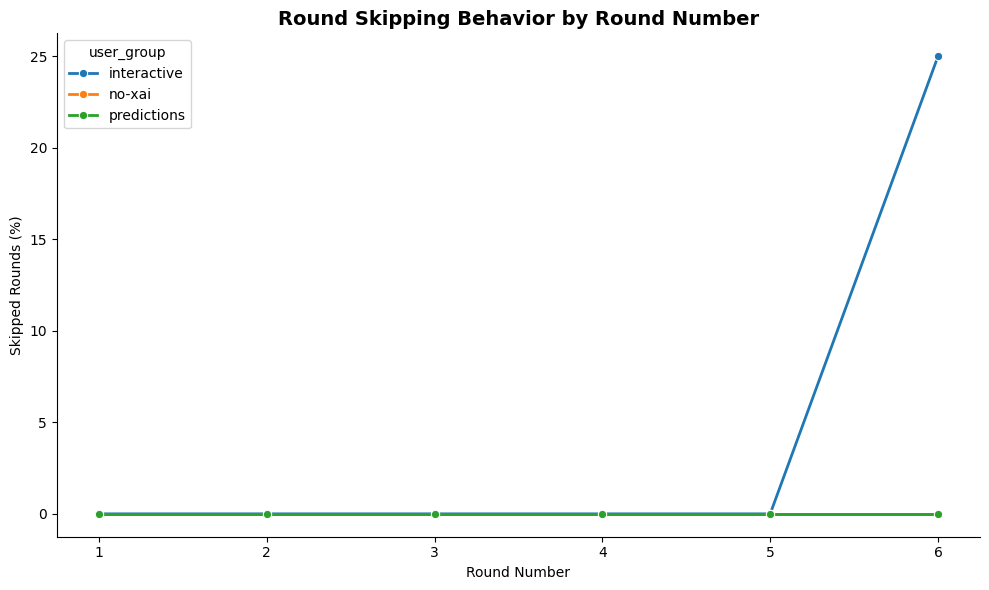

In [265]:
# Create column to flag skipped rounds
df_candidates['invited'] = df_candidates['invited'].astype(bool)

round_skips = df_candidates.groupby(['user_group', 'session_id', 'round_number']).agg(
    any_invited=('invited', 'sum')
).reset_index()

# Flag skipped rounds
round_skips['skipped'] = round_skips['any_invited'] == 0

# Calculate skip rates per round number and user group
skip_rate = round_skips.groupby(['user_group', 'round_number']).agg(
    skipped_rounds=('skipped', 'sum'),
    total_rounds=('skipped', 'count')
).reset_index()

skip_rate['skip_pct'] = 100 * skip_rate['skipped_rounds'] / skip_rate['total_rounds']

plt.figure(figsize=(10, 6))
sns.lineplot(data=skip_rate, x='round_number', y='skip_pct', hue='user_group', marker='o', linewidth=2)

# Style tweaks
sns.despine(top=True, right=True)
plt.grid(False)                       

plt.title('Round Skipping Behavior by Round Number', fontsize=14, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Skipped Rounds (%)')
plt.xticks(skip_rate['round_number'].unique())
plt.tight_layout()
plt.show()

> How different are candidates on skipped rounds?

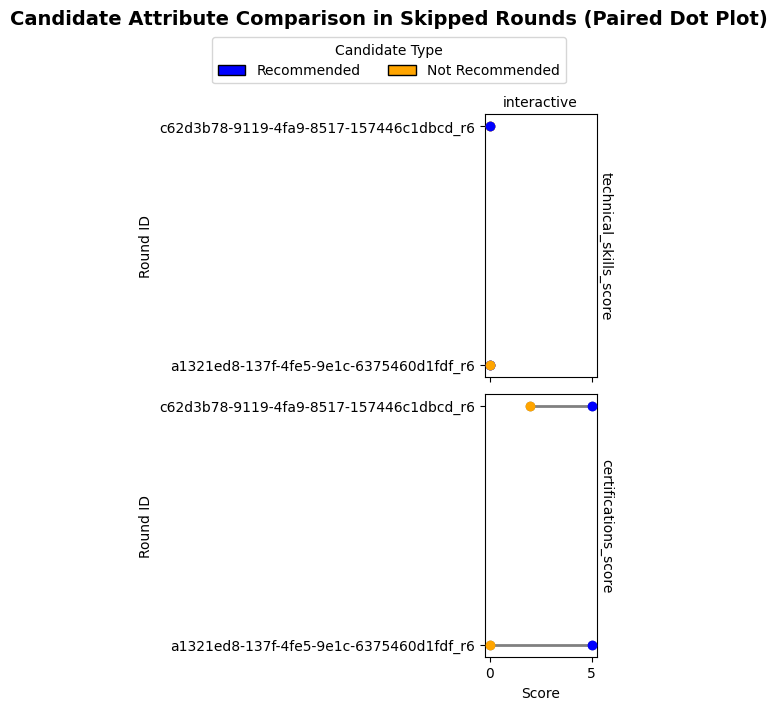

In [266]:
# Filter skipped rounds (no invited candidates)
rounds_no_invites = df_candidates.groupby(['session_id', 'round_number']).agg(
    invited_any=('invited', 'sum'),
    user_group=('user_group', 'first')
).reset_index()
skipped_rounds = rounds_no_invites[rounds_no_invites['invited_any'] == 0]

# Extract candidates from skipped rounds
skipped_candidates = df_candidates.merge(
    skipped_rounds[['session_id', 'round_number']], on=['session_id', 'round_number']
)

# Prepare long-form dataframe for plotting
long_df = skipped_candidates.melt(
    id_vars=['user_group', 'session_id', 'round_number', 'candidate_id', 'recommended'],
    value_vars=['technical_skills_score', 'certifications_score'],
    var_name='attribute',
    value_name='score'
)
long_df['round_id'] = long_df['session_id'] + '_r' + long_df['round_number'].astype(str)

def draw_dumbbell(data, **kwargs):
    for _, group in data.groupby('round_id'):
        scores = group.sort_values('candidate_id')['score'].values
        rid = group['round_id'].iloc[0]
        plt.plot(scores, [rid]*2, marker='o', color='gray', linewidth=2)
        for _, row in group.iterrows():
            plt.scatter(row['score'], rid, color='blue' if row['recommended'] else 'orange', zorder=3)


# Build the FacetGrid once
g = sns.FacetGrid(
    long_df,
    col='user_group',
    row='attribute',
    height=3.5,
    aspect=1.4,
    margin_titles=True,
    despine=False
)

# Draw dumbbell plot
g.map_dataframe(draw_dumbbell)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels("Score", "Round ID")

# Create legend elements
legend_elements = [
    Patch(facecolor='blue', edgecolor='black', label='Recommended'),
    Patch(facecolor='orange', edgecolor='black', label='Not Recommended')
]

# Adjust layout to make room for title + legend
g.fig.subplots_adjust(top=0.83)

# Add title
g.fig.suptitle(
    "Candidate Attribute Comparison in Skipped Rounds (Paired Dot Plot)",
    fontsize=14, fontweight='bold'
)

# Add legend below title (above top row of plots)
g.fig.legend(
    handles=legend_elements,
    title='Candidate Type',
    loc='upper center',
    bbox_to_anchor=(0.5, 0.95),  # Adjust this if spacing needs to shift
    ncol=2,
    frameon=True
)

plt.show()


### 2.2 Trust in AI
> Do users invite non-recommended candidates?

Metric:
```
% of invited candidates that were also recommended
Grouped by: user_group
```


In [267]:
# --- 2.2 Trust in AI ---
# % of invited candidates that were also recommended
invited_candidates = df_candidates[df_candidates['invited']]
trust_in_ai = (
    invited_candidates
    .groupby('user_group')
    .agg(invited_and_recommended=('recommended', 'sum'), total_invited=('recommended', 'count'))
    .assign(trust_rate=lambda x: 100 * x['invited_and_recommended'] / x['total_invited'])
    .reset_index()
)

In [268]:
dataframe_rec_metrics=rec_acceptance.merge(trust_in_ai, on='user_group')

In [269]:
dataframe_rec_metrics

,user_group,recommended_invited,total_recommended,acceptance_rate,invited_and_recommended,total_invited,trust_rate
0,interactive,22,48,45.833333,22,46,47.826087
1,no-xai,9,18,50.000000,9,18,50.000000
2,predictions,10,24,41.666667,10,24,41.666667


### 2.3 Confidence Threshold Effect

> Do users follow recommendations more when the AI’s prediction probability is high?

Group by confidence bins (e.g. 0.6–0.7, 0.7–0.8...) and compute invite rates.

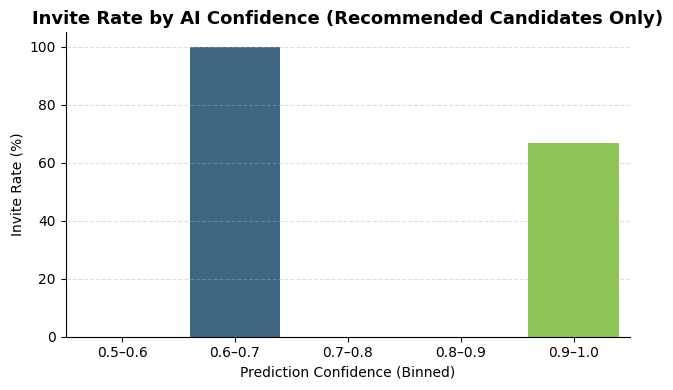

In [314]:
# Fix prediction_probability values if they're nested
df_manipulations['prediction_probability'] = df_manipulations['prediction_probability'].apply(
    lambda x: x if isinstance(x, float) else x.get('value') if isinstance(x, dict) else None
)

# Extract prediction probabilities for AI-enabled user groups
rec_probs = df_manipulations[
    df_manipulations['user_group'].isin(['predictions', 'interactive'])
][['session_id', 'round_number', 'candidate_id', 'prediction_probability']].drop_duplicates()

# Merge into candidate data
df_conf = df_candidates.merge(
    rec_probs,
    on=['session_id', 'round_number', 'candidate_id'],
    how='left'
)

# Filter recommended candidates with valid prediction probabilities
df_conf = df_conf[
    (df_conf['user_group'].isin(['predictions', 'interactive'])) &
    (df_conf['recommended']) &
    (df_conf['prediction_probability'].notna())
]

# Bin confidence values
bins = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0.5–0.6', '0.6–0.7', '0.7–0.8', '0.8–0.9', '0.9–1.0']
df_conf['confidence_bin'] = pd.cut(df_conf['prediction_probability'], bins=bins, labels=labels, include_lowest=True)

# Compute invite rate per bin
bin_stats = df_conf.groupby('confidence_bin').agg(
    total=('candidate_id', 'count'),
    invited=('invited', 'sum')
).reset_index()
bin_stats['invite_rate'] = 100 * bin_stats['invited'] / bin_stats['total']

# Plot
plt.figure(figsize=(6.5, 4))
sns.barplot(data=bin_stats, x='confidence_bin', y='invite_rate', palette='viridis')
plt.title('Invite Rate by AI Confidence (Recommended Candidates Only)', fontsize=13, fontweight='bold')
plt.ylabel('Invite Rate (%)')
plt.xlabel('Prediction Confidence (Binned)')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 3. **Manipulation Behavior (Manipulation Group Only)**

### 3.1 Manipulated Attribute Frequency
> Which attributes do users change most often?

- Distribution of `changed_attribute`

In [271]:
# --- 3.1 Manipulated Attribute Frequency ---
# Count how many times each attribute was changed across all manipulation events
manip_attr_freq = df_manipulations['changed_attribute'].value_counts().reset_index()
manip_attr_freq.columns = ['changed_attribute', 'count']
print("Manipulated Attribute Frequency:")
manip_attr_freq

Manipulated Attribute Frequency:


,changed_attribute,count
0,age,22
1,race,5



### 3.2 GoodFit Shift Analysis
> Do users “game” the AI?

- Δ prediction probability (before vs. after)
- Label change counts (`is_good_fit: False → True`)
- SHAP contribution differences

In [272]:
# Group by candidate_id (and, optionally, by changed_attribute if you want to compare within each attribute)
grouped = df_manipulations.groupby(['candidate_id', 'changed_attribute'])

# 3.2a Delta Prediction Probability:
# For each candidate and attribute, compute the difference in prediction_probability 
# between the last and first manipulation event.
def safe_delta(x):
    # Ensure values are numeric and handle potential issues
    try:
        return float(x.iloc[-1]) - float(x.iloc[0])
    except Exception as e:
        print(f"Skipping delta calculation due to error: {e}")
        return None

delta_predictions = grouped['prediction_probability'].apply(safe_delta).dropna()
delta_summary = delta_predictions.describe()
print("\nDelta Prediction Probability Summary:")
print(delta_summary)

# 3.2b Label Change Counts (False → True):
# For each candidate and attribute, check if the first event had is_good_fit==False and
# the last event had is_good_fit==True.
def safe_label_shift(x):
    # Ensure values are boolean and handle potential issues
    try:
        return x.iloc[0] == False and x.iloc[-1] == True
    except Exception as e:
        print(f"Skipping label check due to error: {e}")
        return False

label_shift = grouped['is_good_fit'].apply(safe_label_shift)
label_shift_counts = label_shift.sum()
print("\nLabel Shift Counts (False -> True):", label_shift_counts)

Skipping delta calculation due to error: float() argument must be a string or a real number, not 'dict'

Delta Prediction Probability Summary:
count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: prediction_probability, dtype: float64

Label Shift Counts (False -> True): 0


In [273]:
def compute_shap_diff(group):
    first_features = group.iloc[0]['xai_features'] or []
    last_features = group.iloc[-1]['xai_features'] or []
    # Convert list of dicts to a dictionary: {Feature: SHAP Value}
    first_dict = {d['Feature']: d['SHAP Value'] for d in first_features}
    last_dict = {d['Feature']: d['SHAP Value'] for d in last_features}
    # Get the union of features
    features = set(first_dict.keys()).union(last_dict.keys())
    diff = {feat: last_dict.get(feat, 0) - first_dict.get(feat, 0) for feat in features}
    return diff

In [274]:
# Apply the function per candidate and attribute
shap_diffs = grouped.apply(compute_shap_diff)

# Convert the resulting Series (with multi-index) of dictionaries into a DataFrame
shap_diff_df = pd.DataFrame(list(shap_diffs))

# Compute the mean difference for each feature and sort descending
shap_contrib_summary = shap_diff_df.mean().sort_values(ascending=False)
print("\nMean SHAP Contribution Differences:")
print(shap_contrib_summary.head(10))


Mean SHAP Contribution Differences:
Basic Machinery Maintenance           0.0
Teamwork                              0.0
Basic Safety Certification            0.0
Problem Identification                0.0
OSHA Certification                    0.0
Education                             0.0
Advanced Machinery Troubleshooting    0.0
YearsExperience                       0.0
Leadership Skills                     0.0
Department_Production                 0.0
dtype: float64


/var/folders/0z/26cwjfqx4fj73hndqg4mkgl80000gn/T/ipykernel_2280/339792353.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shap_diffs = grouped.apply(compute_shap_diff)


### 3.3 Manipulation Success Rate

> When users manipulate, how often do they succeed in flipping the AI label?

% of manipulated candidates where is_good_fit changed from False to True

NOTE: Success Rate: Out of all user manipulations, how many successfully changed the AI’s label from “Not a Good Fit” to “Good Fit”?

In [275]:
manip_df = df_manipulations.copy()
manip_df['label_flipped'] = manip_df['is_good_fit']  # True if changed from False to True (already flipped)

# Compute success rate per user group
success_rate = manip_df.groupby('user_group').agg(
    total_manipulations=('label_flipped', 'count'),
    successful_flips=('label_flipped', 'sum')
).reset_index()

success_rate['success_rate'] = 100 * success_rate['successful_flips'] / success_rate['total_manipulations']
success_rate['success_rate']

0    92.592593
Name: success_rate, dtype: float64

> Avg successrate per round?

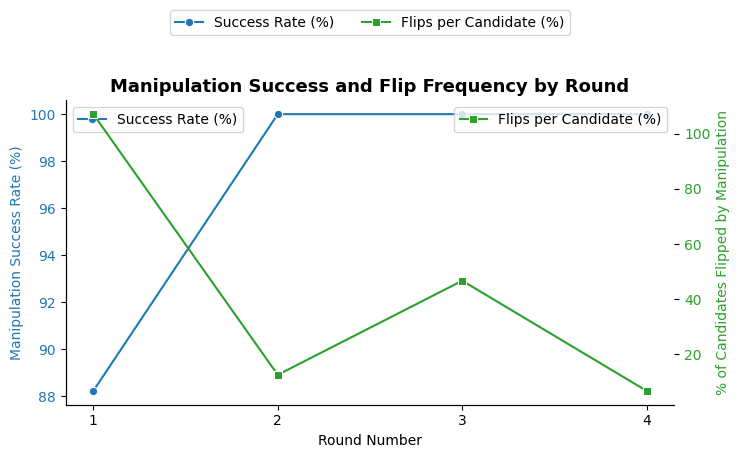

In [276]:
manip_df = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()
manip_df['label_flipped'] = manip_df['is_good_fit']

# Total candidates per round (needed for normalization)
round_candidates = df_candidates[df_candidates['user_group'] == 'interactive'].groupby('round_number') \
    .agg(total_candidates=('candidate_id', 'nunique')).reset_index()

# Manipulation success stats per round
round_success = manip_df.groupby('round_number').agg(
    total_manipulations=('label_flipped', 'count'),
    successful_flips=('label_flipped', 'sum')
).reset_index()

# Merge in total candidate counts
round_success = round_success.merge(round_candidates, on='round_number', how='left')

# Compute metrics
round_success['success_rate'] = 100 * round_success['successful_flips'] / round_success['total_manipulations']
round_success['flips_per_candidate_pct'] = 100 * round_success['successful_flips'] / round_success['total_candidates']
round_success['round_number'] = round_success['round_number'].astype(int)

# Plot: Line plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(7.5, 4))

# Success Rate Line
sns.lineplot(
    data=round_success,
    x='round_number',
    y='success_rate',
    marker='o',
    label='Success Rate (%)',
    ax=ax1,
    color='tab:blue'
)
ax1.set_ylabel('Manipulation Success Rate (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Round Number')
ax1.set_title('Manipulation Success and Flip Frequency by Round', fontsize=13, fontweight='bold')
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True)) 

# Flip per candidate line
ax2 = ax1.twinx()
sns.lineplot(
    data=round_success,
    x='round_number',
    y='flips_per_candidate_pct',
    marker='s',
    label='Flips per Candidate (%)',
    ax=ax2,
    color='tab:green'
)
ax2.set_ylabel('% of Candidates Flipped by Manipulation', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

> Do users trust the downgraded label after manipulation to not_good_fit for candidates that are equal/when non-recommended candidate is better objectively?

In [277]:
df_candidates.head()

,session_id,user_group,round_number,candidate_id,name,invited,recommended,good_fit,manipulated,sex,race,age,years_experience,degree_score,technical_skills_score,certifications_score,hover_events,manipulations
0,0312bafb-150f-433f-8297-d43591af96b0,no-xai,1,1009,Kinley Dean,True,False,False,False,Male,White,42,0.0,NaN,0,5,[],[]
1,0312bafb-150f-433f-8297-d43591af96b0,no-xai,1,776,Lilianna Mccall,False,True,True,False,Female,White,36,0.0,NaN,0,5,[],[]
2,0312bafb-150f-433f-8297-d43591af96b0,no-xai,2,155,Hailee Raymond,True,True,True,False,Male,White,47,0.0,NaN,0,2,[],[]
3,0312bafb-150f-433f-8297-d43591af96b0,no-xai,2,819,Simon Rivers,False,False,False,False,Male,Black,60,0.0,NaN,0,5,[],[]
4,0312bafb-150f-433f-8297-d43591af96b0,no-xai,3,1058,Jaelynn Salazar,True,True,True,False,Female,White,38,0.0,NaN,0,5,[],[]


In [278]:
# Filter for candidates who were downgraded after manipulation
manip_flips = df_manipulations[
    (df_manipulations['user_group'] == 'interactive') &
    (df_manipulations['is_good_fit'] == False)
].copy()

# Merge to get full candidate info
flipped_with_meta = manip_flips.merge(
    df_candidates[['session_id', 'round_number', 'candidate_id', 'invited', 'degree_score', 'technical_skills_score', 'certifications_score']],
    on=['session_id', 'round_number', 'candidate_id'],
    how='left'
).rename(columns={
    'invited': 'flipped_invited',
    'technical_skills_score': 'flipped_tech',
    'certifications_score': 'flipped_cert'
})

# Get the full pair from the same round
round_pairs = df_candidates[df_candidates['user_group'] == 'interactive'][[
    'session_id', 'round_number', 'candidate_id', 'invited', 'degree_score', 'technical_skills_score', 'certifications_score'
]].rename(columns={
    'invited': 'other_invited',
    'candidate_id': 'other_candidate_id',
    'technical_skills_score': 'other_tech',
    'certifications_score': 'other_cert'
})

# Merge the other candidate from the same round (excluding self)
merged = flipped_with_meta.merge(
    round_pairs,
    on=['session_id', 'round_number'],
    how='left'
)

# Drop rows where the candidate is the same as flipped one (self-join case)
merged = merged[merged['candidate_id'] != merged['other_candidate_id']]

# Define whether other candidate is better (sum of tech + cert)
merged['flipped_score'] = merged['flipped_tech'] + merged['flipped_cert']
merged['other_score'] = merged['other_tech'] + merged['other_cert']
merged['other_is_better'] = merged['other_score'] > merged['flipped_score']

# Aggregate
trust_behavior = merged.groupby(['other_is_better', 'other_invited']).size().reset_index(name='count')

# Normalize for easier interpretation
trust_behavior['percent'] = trust_behavior['count'] / trust_behavior['count'].sum() * 100
trust_behavior

,other_is_better,other_invited,count,percent
0,False,False,1,50.0
1,True,False,1,50.0


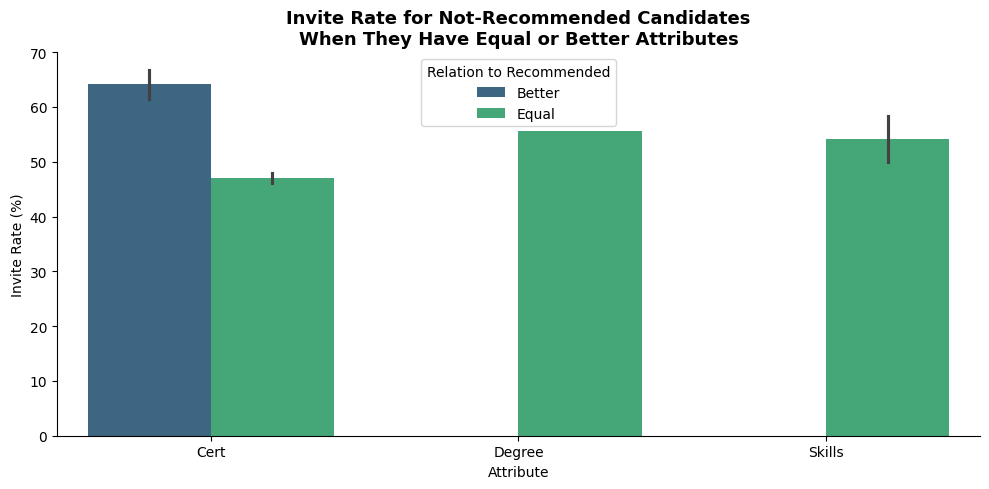

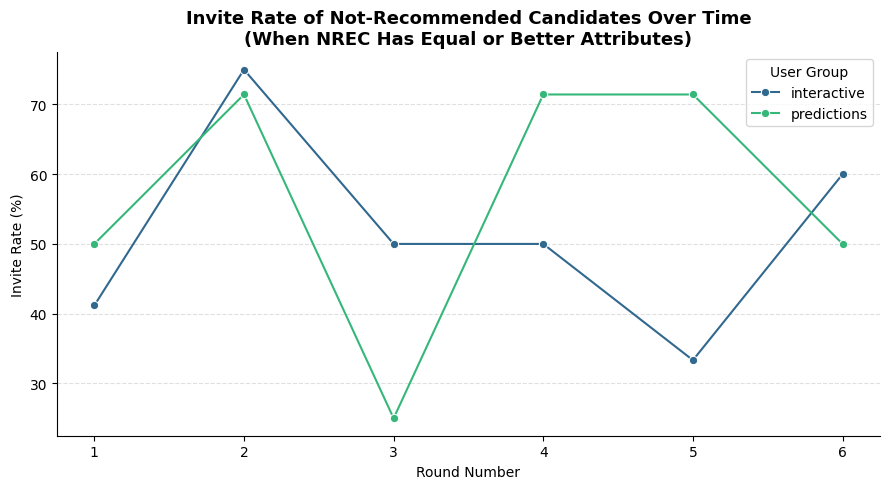

In [308]:
# Only AI-enabled groups
df_ai = df_candidates[df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])].copy()

# Pair candidates by session + round
pairs = df_ai.merge(
    df_ai,
    on=['session_id', 'round_number'],
    suffixes=('_rec', '_nrec')
)

# Keep pairs where one is recommended and one is not
pairs = pairs[
    (pairs['recommended_rec'] == True) &
    (pairs['recommended_nrec'] == False) &
    (pairs['candidate_id_rec'] != pairs['candidate_id_nrec'])
]

# Comparison metrics
pairs['nrec_better_degree'] = pairs['degree_score_nrec'] > pairs['degree_score_rec']
pairs['nrec_equal_degree'] = pairs['degree_score_nrec'] == pairs['degree_score_rec']
pairs['nrec_better_skills'] = pairs['technical_skills_score_nrec'] > pairs['technical_skills_score_rec']
pairs['nrec_equal_skills'] = pairs['technical_skills_score_nrec'] == pairs['technical_skills_score_rec']
pairs['nrec_better_cert'] = pairs['certifications_score_nrec'] > pairs['certifications_score_rec']
pairs['nrec_equal_cert'] = pairs['certifications_score_nrec'] == pairs['certifications_score_rec']
pairs['invited_nrec'] = pairs['invited_nrec'] == True

# Melt for long format
melted = pairs.melt(
    id_vars=['user_group_rec', 'round_number', 'invited_nrec'],
    value_vars=[
        'nrec_better_degree', 'nrec_equal_degree',
        'nrec_better_skills', 'nrec_equal_skills',
        'nrec_better_cert', 'nrec_equal_cert'
    ],
    var_name='comparison',
    value_name='nrec_is_better_or_equal'
)

# Filter for when NREC is better or equal
melted = melted[melted['nrec_is_better_or_equal']]

# Clean up labels
melted['dimension'] = melted['comparison'].str.extract(r'nrec_(better|equal)_(.*)')[1].str.title()
melted['relation'] = melted['comparison'].str.extract(r'nrec_(better|equal)_')[0].str.title()

# Plot 1: Invite Rate by Group + Dimension
grouped = melted.groupby(['user_group_rec', 'dimension', 'relation']).agg(
    count=('invited_nrec', 'count'),
    invite_rate=('invited_nrec', 'mean')
).reset_index()
grouped['invite_rate'] *= 100

plt.figure(figsize=(10, 5))
sns.barplot(
    data=grouped,
    x='dimension',
    y='invite_rate',
    hue='relation',
    palette='viridis'
)
plt.title('Invite Rate for Not-Recommended Candidates\nWhen They Have Equal or Better Attributes', fontsize=13, fontweight='bold')
plt.ylabel('Invite Rate (%)')
plt.xlabel('Attribute')
plt.legend(title='Relation to Recommended')
sns.despine()
plt.tight_layout()
plt.show()

# Plot 2: Invite Trend Over Rounds
round_trend = melted.groupby(['round_number', 'user_group_rec']).agg(
    invite_share=('invited_nrec', 'mean'),
    count=('invited_nrec', 'count')
).reset_index()
round_trend['invite_share'] *= 100

plt.figure(figsize=(9, 5))
sns.lineplot(
    data=round_trend,
    x='round_number',
    y='invite_share',
    hue='user_group_rec',
    marker='o',
    palette='viridis'
)
plt.title('Invite Rate of Not-Recommended Candidates Over Time\n(When NREC Has Equal or Better Attributes)', fontsize=13, fontweight='bold')
plt.ylabel('Invite Rate (%)')
plt.xlabel('Round Number')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='User Group')
sns.despine()
plt.tight_layout()
plt.show()

### 3.4 Manipulation + Invite Correlation

> Are manipulated candidates more or less likely to be invited?

Compare invite rates of manipulated vs. non-manipulated candidates.

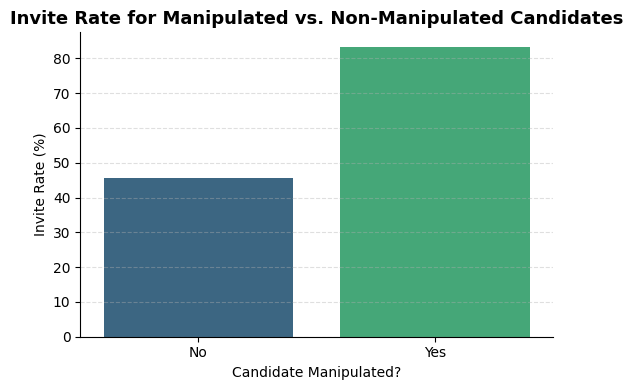

,manipulated,total,invited,invite_rate,Manipulated
0,False,90,41,45.555556,No
1,True,6,5,83.333333,Yes


In [309]:
# Filter to interactive group
df_interactive = df_candidates[df_candidates['user_group'] == 'interactive'].copy()

# Ensure manipulation flag is boolean
df_interactive['manipulated'] = df_interactive['manipulated'].astype(bool)

# Compute invite rate per manipulation group
manip_invite_stats = df_interactive.groupby('manipulated').agg(
    total=('candidate_id', 'count'),
    invited=('invited', 'sum')
).reset_index()

manip_invite_stats['invite_rate'] = 100 * manip_invite_stats['invited'] / manip_invite_stats['total']
manip_invite_stats['Manipulated'] = manip_invite_stats['manipulated'].map({True: 'Yes', False: 'No'})

# Plot
plt.figure(figsize=(5.5, 4))
sns.barplot(data=manip_invite_stats, x='Manipulated', y='invite_rate', palette='viridis')
plt.title('Invite Rate for Manipulated vs. Non-Manipulated Candidates', fontsize=13, fontweight='bold')
plt.ylabel('Invite Rate (%)')
plt.xlabel('Candidate Manipulated?')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

manip_invite_stats

## 4. **Temporal Dynamics & Decision Fatigue**

### 4.1 Invite Trends Over Rounds
> Do participants become more selective over time?

- Avg. `invited_count` per round_index per user group
- Line plots for rounds 1 → N

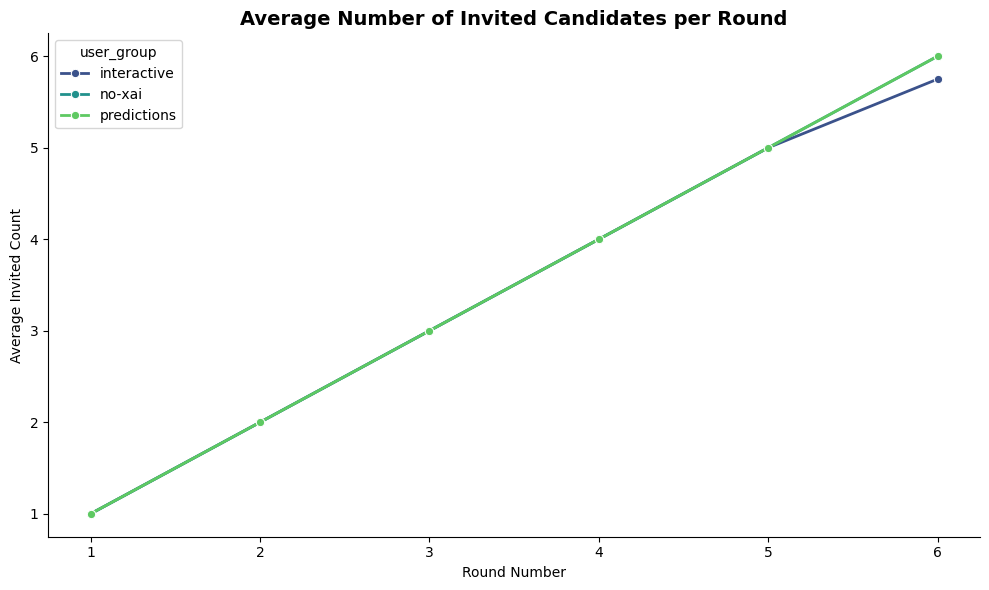

In [279]:
# Ensure invited_count is numeric
df_rounds['invited_count'] = pd.to_numeric(df_rounds['invited_count'], errors='coerce')

# Compute average invited count per round number and user group
invite_trends = df_rounds.groupby(['user_group', 'round_number']).agg(
    avg_invited_count=('invited_count', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=invite_trends,
    x='round_number',
    y='avg_invited_count',
    hue='user_group',
    marker='o',
    linewidth=2,
    palette='viridis'
)

sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Average Number of Invited Candidates per Round', fontsize=14, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Average Invited Count')
plt.xticks(invite_trends['round_number'].unique())
plt.tight_layout()
plt.show()

### 4.2 Round Duration Patterns
> Does decision time drop with fatigue?

- Avg. round duration by round index by user group

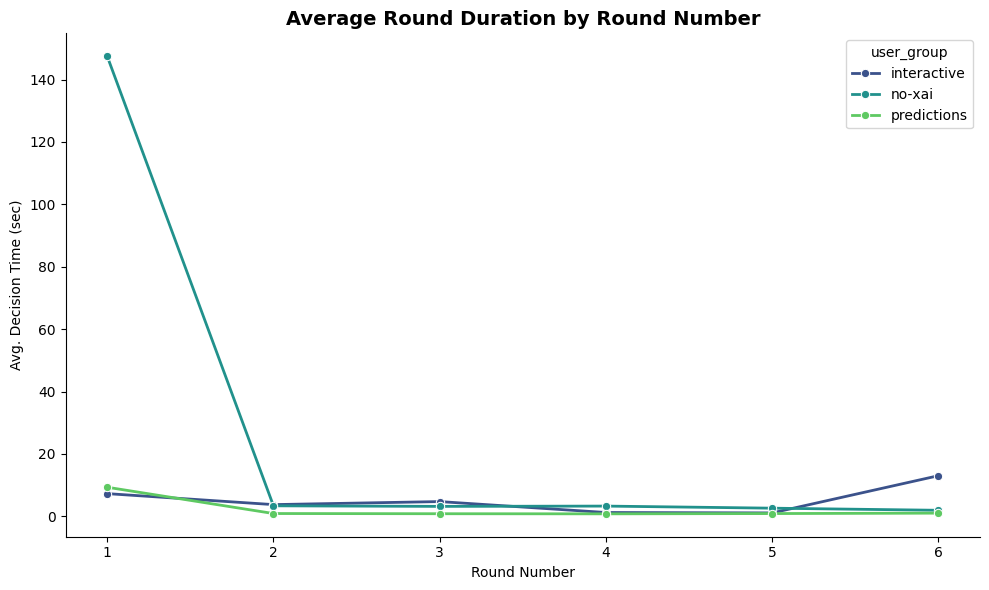

In [280]:
# Ensure round_duration is numeric
df_rounds['round_duration'] = pd.to_numeric(df_rounds['round_duration'], errors='coerce')

# Group and calculate average duration
duration_trends = df_rounds.groupby(['user_group', 'round_number']).agg(
    avg_round_duration=('round_duration', 'mean')
).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=duration_trends,
    x='round_number',
    y='avg_round_duration',
    hue='user_group',
    marker='o',
    linewidth=2,
    palette='viridis'
)

# Style
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Average Round Duration by Round Number', fontsize=14, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Avg. Decision Time (sec)')
plt.xticks(duration_trends['round_number'].unique())
plt.tight_layout()
plt.show()

> For interactive user group, do they use the manipulation tool less in later rounds?

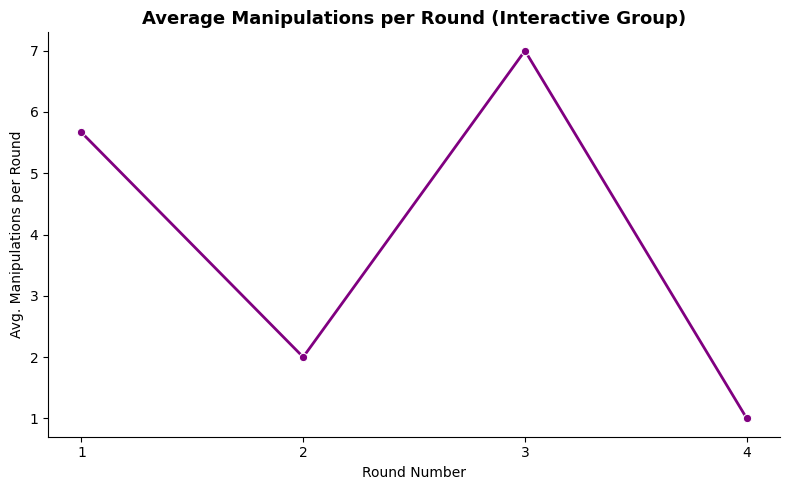

In [281]:
df_interactive = df_manipulations[df_manipulations['user_group'] == 'interactive']

# Count manipulations per session and round
per_session_counts = df_interactive.groupby(['session_id', 'round_number']).size().reset_index(name='manip_count')

# Average manipulations per round
manip_usage_avg = per_session_counts.groupby('round_number').agg(
    avg_manipulations=('manip_count', 'mean')
).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=manip_usage_avg, x='round_number', y='avg_manipulations', marker='o', linewidth=2, color='purple')
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Average Manipulations per Round (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Avg. Manipulations per Round')
plt.xticks(manip_usage_avg['round_number'].unique())
plt.tight_layout()
plt.show()

> In all usergroups with ai, can we see a behavior shift?

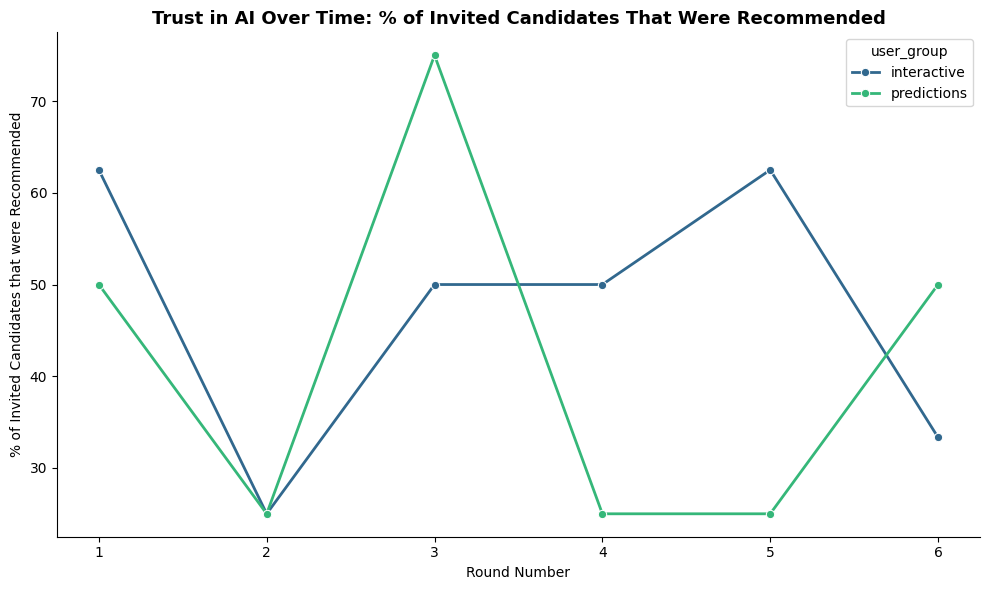

In [282]:
# 1. Filter AI-supported groups
ai_groups = ['predictions', 'interactive', 'badge']
df_ai = df_candidates[df_candidates['user_group'].isin(ai_groups)].copy()

# 2. Ensure correct dtypes
df_ai['invited'] = df_ai['invited'].astype(bool)
df_ai['recommended'] = df_ai['recommended'].astype(bool)

# 3. Filter to invited candidates only
invited = df_ai[df_ai['invited']]

# 4. Compute % of invited candidates that were recommended, per round and user group
trust_trend = invited.groupby(['user_group', 'round_number']).agg(
    recommended_invites=('recommended', 'sum'),
    total_invited=('recommended', 'count')
).reset_index()
trust_trend['pct_recommended'] = 100 * trust_trend['recommended_invites'] / trust_trend['total_invited']

# 5. Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=trust_trend, x='round_number', y='pct_recommended', hue='user_group', marker='o', linewidth=2, palette='viridis')
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Trust in AI Over Time: % of Invited Candidates That Were Recommended', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('% of Invited Candidates that were Recommended')
plt.xticks(trust_trend['round_number'].unique())
plt.tight_layout()
plt.show()

> When users manipulate candidates, are they less likely to invite the AI-recommended one?
In other words: does manual manipulation = lower AI trust?

                               combo  invited_rate  count
1          Recommended & Manipulated      0.833333      6
0  Not Recommended & Not Manipulated      0.500000     48
2      Recommended & Not Manipulated      0.404762     42


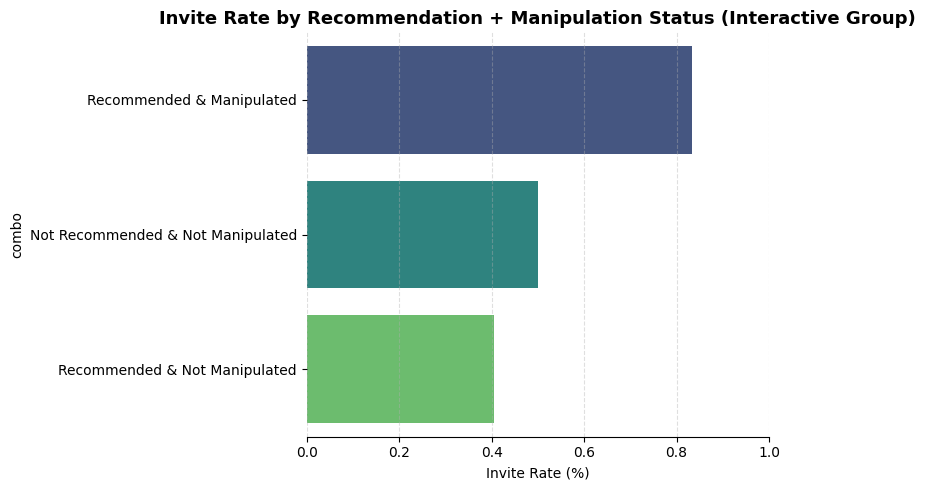

In [283]:
# Filter interactive group
df_int = df_candidates[df_candidates['user_group'] == 'interactive'].copy()

# Ensure booleans
df_int['invited'] = df_int['invited'].astype(bool)
df_int['recommended'] = df_int['recommended'].astype(bool)
df_int['manipulated'] = df_int['manipulated'].astype(bool)

# Create 2-way label: (recommended vs not) and (manipulated vs not)
df_int['combo'] = df_int.apply(
    lambda row: f"{'Recommended' if row['recommended'] else 'Not Recommended'} & "
                f"{'Manipulated' if row['manipulated'] else 'Not Manipulated'}",
    axis=1
)

# Compute invite rates per group
invite_behavior = df_int.groupby('combo').agg(
    invited_rate=('invited', 'mean'),
    count=('invited', 'count')
).reset_index().sort_values(by='invited_rate', ascending=False)

print(invite_behavior)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=invite_behavior,
    x='invited_rate',
    y='combo',
    hue='combo',           # Required when passing `palette`
    palette='viridis',
    legend=False           # Hide redundant legend
)
plt.xlabel('Invite Rate (%)')
plt.title('Invite Rate by Recommendation + Manipulation Status (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, top=True)
plt.tight_layout()
plt.show()


Each bar shows the **percentage of candidates invited**, based on two factors:
- Whether the **AI recommended** them
- Whether the **user manipulated** them

**Interpretation Framework:**

| Bar Label                             | What it Represents                                      | How to Interpret                                                             |
|--------------------------------------|----------------------------------------------------------|------------------------------------------------------------------------------|
| **Recommended & Not Manipulated**    | AI said "yes", user left it as-is                       | Baseline trust — invited because they trusted AI                          |
| **Recommended & Manipulated**        | AI said "yes", user **changed something**               | User might've doubted the AI — did manipulation reduce invite chance?     |
| **Not Recommended & Manipulated**    | AI said "no", but user **manually adjusted**            | Active override — user possibly trusted their own judgment more           |
| **Not Recommended & Not Manipulated**| AI said "no", and user left it that way                 | Expected lowest invite rate — full AI alignment                           |


**What patterns to look for:**

1. **Trust in AI**:
   - If `Recommended & Not Manipulated` has a **high invite rate** → users **trust the AI**
   - If `Recommended & Manipulated` has a **lower rate** → manipulation **reduces trust**

2. **Overrides**:
   - If `Not Recommended & Manipulated` has a **moderate or high rate** → users **override the AI** after edits

3. **Consistency**:
   - If `Not Recommended & Not Manipulated` has **very low invites** → users **rarely override without edits**

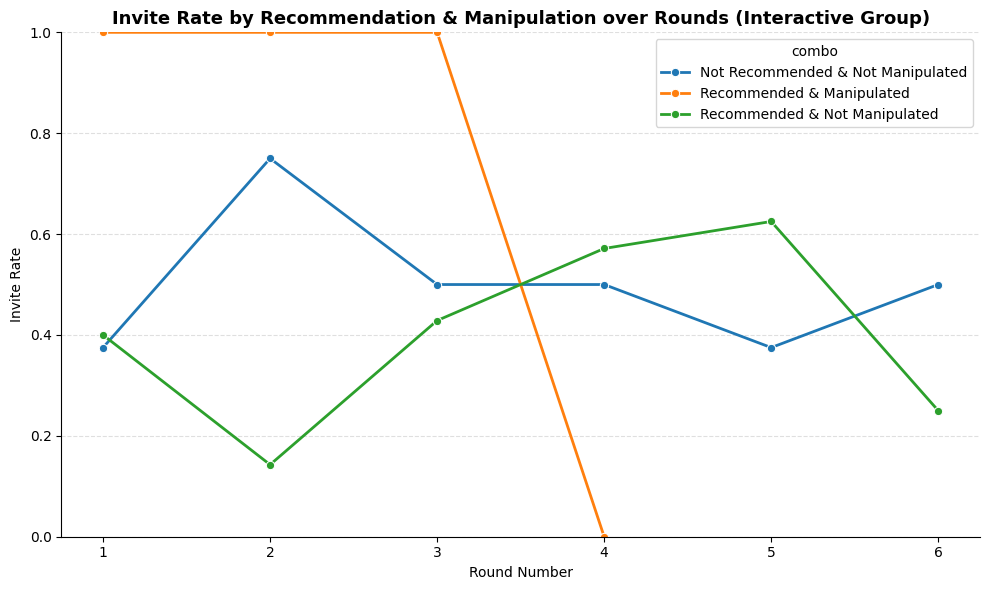

In [284]:
# Step 1: Prepare interactive data
df_int = df_candidates[df_candidates['user_group'] == 'interactive'].copy()
df_int['invited'] = df_int['invited'].astype(bool)
df_int['recommended'] = df_int['recommended'].astype(bool)
df_int['manipulated'] = df_int['manipulated'].astype(bool)

# Step 2: Create 2x2 combo label
df_int['combo'] = df_int.apply(
    lambda row: f"{'Recommended' if row['recommended'] else 'Not Recommended'} & "
                f"{'Manipulated' if row['manipulated'] else 'Not Manipulated'}",
    axis=1
)

# Step 3: Group by round and combo
invite_by_round = df_int.groupby(['round_number', 'combo']).agg(
    invited_rate=('invited', 'mean'),
    count=('invited', 'count')
).reset_index()

# Step 4: Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=invite_by_round,
    x='round_number',
    y='invited_rate',
    hue='combo',
    marker='o',
    linewidth=2
)
plt.title('Invite Rate by Recommendation & Manipulation over Rounds (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Invite Rate')
plt.ylim(0, 1)
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 4.3 Manipulation Timing Fatigue

> Do users manipulate less as rounds go on?

Already partially addressed — could expand with:
- Time between first and last manipulation
- Share of rounds that included manipulation (over time)

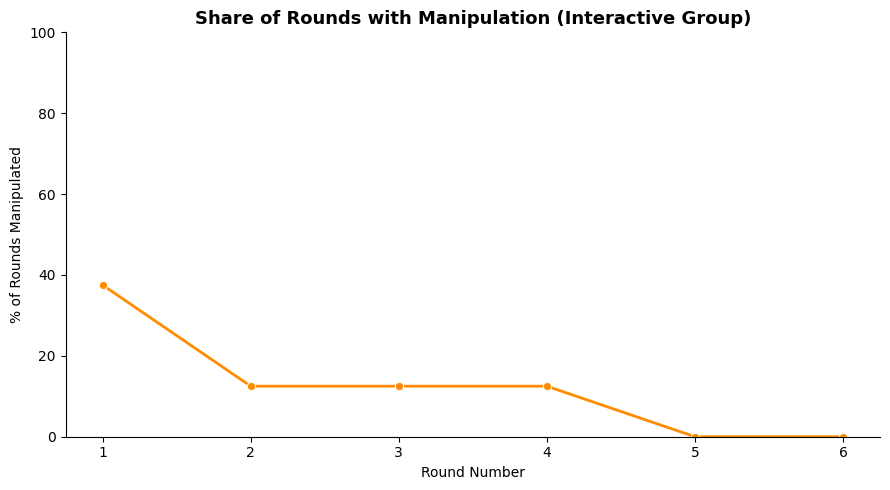

In [285]:
# Filter to interactive group only
df_manip_int = df_manipulations[df_manipulations['user_group'] == 'interactive']
df_rounds_int = df_rounds[df_rounds['user_group'] == 'interactive']

# Mark rounds with manipulation
manip_flags = df_manip_int.groupby(['session_id', 'round_number']).size().reset_index(name='manip_count')
manip_flags['was_manipulated'] = True

# Merge with all interactive rounds
rounds_with_manip_flag = df_rounds_int.merge(
    manip_flags[['session_id', 'round_number', 'was_manipulated']],
    on=['session_id', 'round_number'],
    how='left'
)

# Fill missing values = no manipulation
rounds_with_manip_flag['was_manipulated'] = rounds_with_manip_flag['was_manipulated'].fillna(False).astype(bool)

# Share of rounds with manipulation over time
manip_fatigue = rounds_with_manip_flag.groupby('round_number').agg(
    manipulated_rounds=('was_manipulated', 'sum'),
    total_rounds=('was_manipulated', 'count')
).reset_index()
manip_fatigue['share_manipulated'] = 100 * manip_fatigue['manipulated_rounds'] / manip_fatigue['total_rounds']

# Plot
plt.figure(figsize=(9, 5))
sns.lineplot(data=manip_fatigue, x='round_number', y='share_manipulated', marker='o', linewidth=2, color='darkorange')
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Share of Rounds with Manipulation (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('% of Rounds Manipulated')
plt.xticks(manip_fatigue['round_number'].unique())
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### 4.4 Early Decision Bias

> Are users more likely to invite the first candidate shown in each round?

Could reflect position bias / cognitive shortcuts

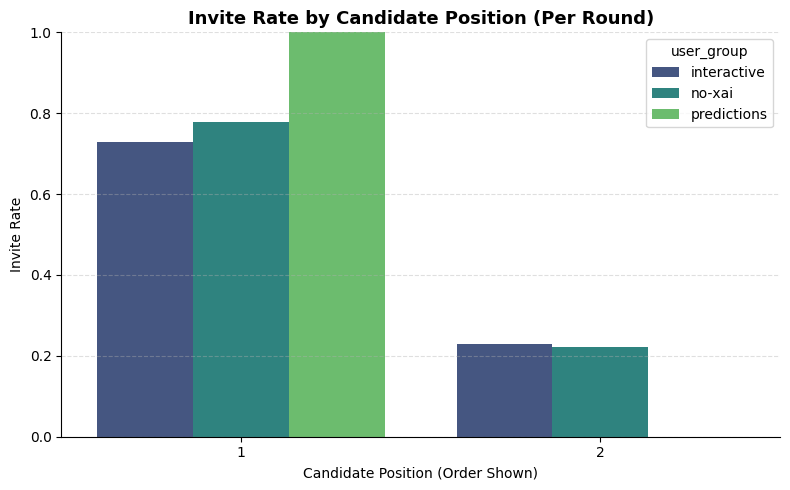

In [286]:
# Filter to relevant fields
df_pos_bias = df_candidates[['session_id', 'round_number', 'candidate_id', 'invited', 'user_group']].copy()

# Assign candidate position (1 or 2) within each round
df_pos_bias['position'] = df_pos_bias.groupby(['session_id', 'round_number']).cumcount() + 1

# Group by position and user group → calculate invite rate
position_bias = df_pos_bias.groupby(['user_group', 'position']).agg(
    invited_rate=('invited', 'mean'),
    count=('invited', 'count')
).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=position_bias, x='position', y='invited_rate', hue='user_group', palette='viridis')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylim(0, 1)
plt.title('Invite Rate by Candidate Position (Per Round)', fontsize=13, fontweight='bold')
plt.xlabel('Candidate Position (Order Shown)')
plt.ylabel('Invite Rate')
plt.tight_layout()
plt.show()

---

## 5. **Between-Group Behavioral Comparison**

### 5.1 Invite Ratio by Group
> Are some groups more generous or cautious?

```
invite_rate = # invited / total candidates
→ Grouped by user_group
```

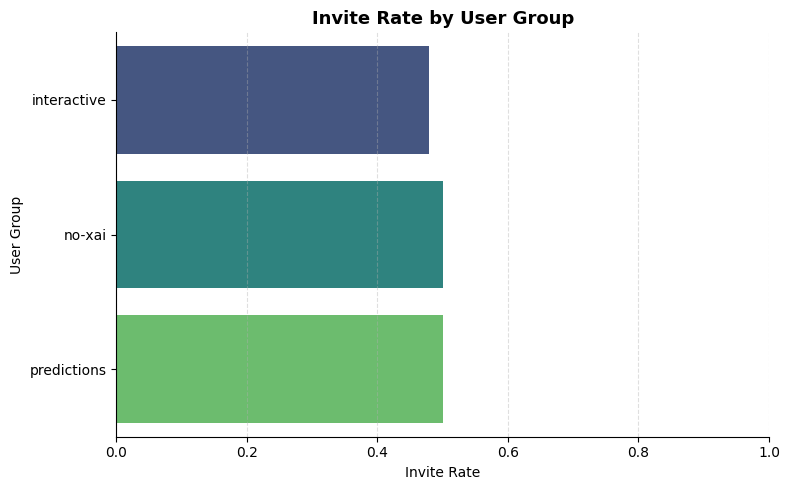

In [287]:
# Ensure 'invited' is boolean
df_candidates['invited'] = df_candidates['invited'].astype(bool)

# Compute invite ratio per user group
invite_ratio = df_candidates.groupby('user_group').agg(
    total_candidates=('candidate_id', 'count'),
    total_invited=('invited', 'sum')
).reset_index()

invite_ratio['invite_rate'] = invite_ratio['total_invited'] / invite_ratio['total_candidates']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=invite_ratio,
    x='invite_rate',
    y='user_group',
    hue='user_group',
    palette='viridis',
    legend=False
)
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlim(0, 1)
plt.xlabel('Invite Rate')
plt.ylabel('User Group')
plt.title('Invite Rate by User Group', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.2 Recommendation Acceptance Rate by Group
> Do explanations increase trust?

```
accept_rate = # invited & recommended / # recommended
→ Grouped by user_group
```

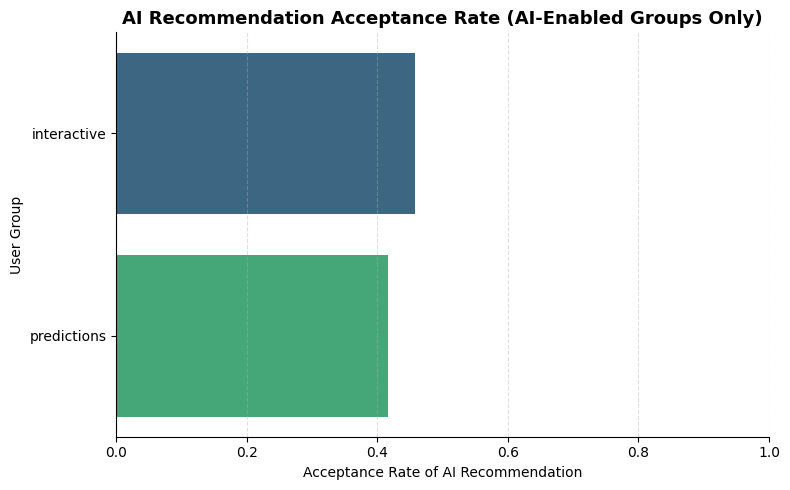

In [288]:
# Ensure booleans are correct
df_candidates['recommended'] = df_candidates['recommended'].astype(bool)
df_candidates['invited'] = df_candidates['invited'].astype(bool)

# Filter to AI-supported groups only (those that received recommendations)
ai_groups = ['badge', 'predictions', 'interactive']
df_ai = df_candidates[df_candidates['user_group'].isin(ai_groups)]

# Filter to recommended candidates
recommended_df = df_ai[df_ai['recommended']]

# Compute acceptance rate
rec_acceptance_rate = recommended_df.groupby('user_group').agg(
    invited_recommended=('invited', 'sum'),
    total_recommended=('invited', 'count')
).reset_index()

rec_acceptance_rate['accept_rate'] = rec_acceptance_rate['invited_recommended'] / rec_acceptance_rate['total_recommended']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=rec_acceptance_rate,
    x='accept_rate',
    y='user_group',
    hue='user_group',
    palette='viridis',
    legend=False
)
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlim(0, 1)
plt.xlabel('Acceptance Rate of AI Recommendation')
plt.ylabel('User Group')
plt.title('AI Recommendation Acceptance Rate (AI-Enabled Groups Only)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.3 Reversal Decisions (AI Distrust Cases)

> How often do users invite the non-recommended candidate?

That shows a lack of trust or a deliberate override — regardless of whether the override was successful.

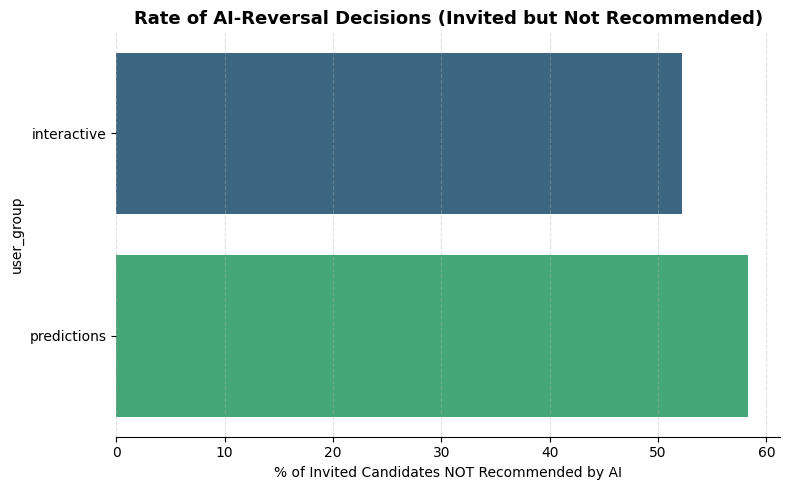

In [289]:
# Only AI-enabled groups
df_ai = df_candidates[df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])].copy()

# Count how often non-recommended candidates were invited
reversal_cases = df_ai[
    (df_ai['invited']) & (~df_ai['recommended'])
]

# Per group
reversal_stats = reversal_cases.groupby('user_group').agg(
    reversals=('candidate_id', 'count')
).reset_index()

# Total invited per group
total_invited = df_ai[df_ai['invited']].groupby('user_group').agg(
    total=('candidate_id', 'count')
).reset_index()

# Merge + compute reversal rate
reversal_stats = reversal_stats.merge(total_invited, on='user_group')
reversal_stats['reversal_rate'] = 100 * reversal_stats['reversals'] / reversal_stats['total']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=reversal_stats, x='reversal_rate', y='user_group', hue='user_group', palette='viridis', legend=False)
sns.despine(left=True, top=True)
plt.xlabel('% of Invited Candidates NOT Recommended by AI')
plt.title('Rate of AI-Reversal Decisions (Invited but Not Recommended)', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 5.5 Skipping Behavior

> Do some groups skip rounds more often?

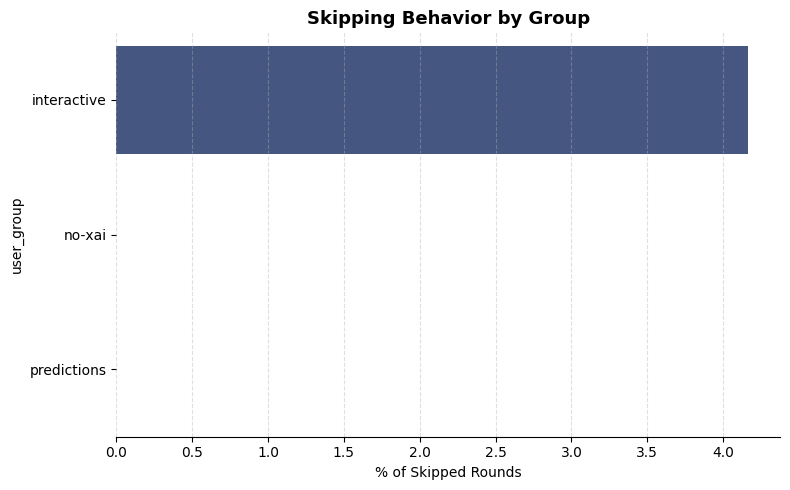

In [290]:
skip_summary = round_skips.groupby('user_group').agg(
    skipped_rounds=('skipped', 'sum'),
    total_rounds=('skipped', 'count')
).reset_index()

skip_summary['skip_rate'] = 100 * skip_summary['skipped_rounds'] / skip_summary['total_rounds']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=skip_summary,
    x='skip_rate',
    y='user_group',
    hue='user_group',
    palette='viridis',
    legend=False
)
sns.despine(left=True, top=True)
plt.xlabel('% of Skipped Rounds')
plt.title('Skipping Behavior by Group', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 5.6 Decision Time per Round

> Do explanation groups take longer to decide?

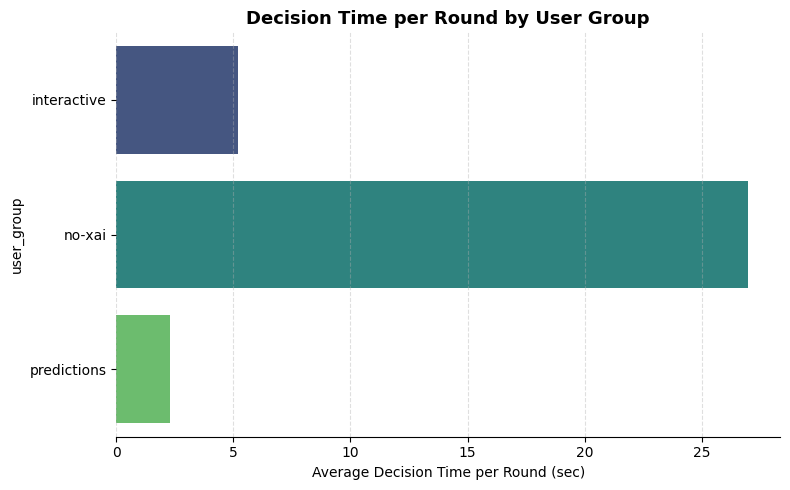

In [291]:
decision_times = df_rounds[['user_group', 'round_duration']].copy()
decision_time_summary = decision_times.groupby('user_group').agg(
    avg_round_duration=('round_duration', 'mean')
).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=decision_time_summary,
    x='avg_round_duration',
    y='user_group',
    hue='user_group',
    palette='viridis',
    legend=False
)
sns.despine(left=True, top=True)
plt.xlabel('Average Decision Time per Round (sec)')
plt.title('Decision Time per Round by User Group', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

---

## 6. **Bias & Fairness Analysis**

### 6.1 Demographic Breakdown of Invitations
> Who gets invited?

- Distributions (race, sex, age) among invited vs. not invited
- Compare to overall candidate pool


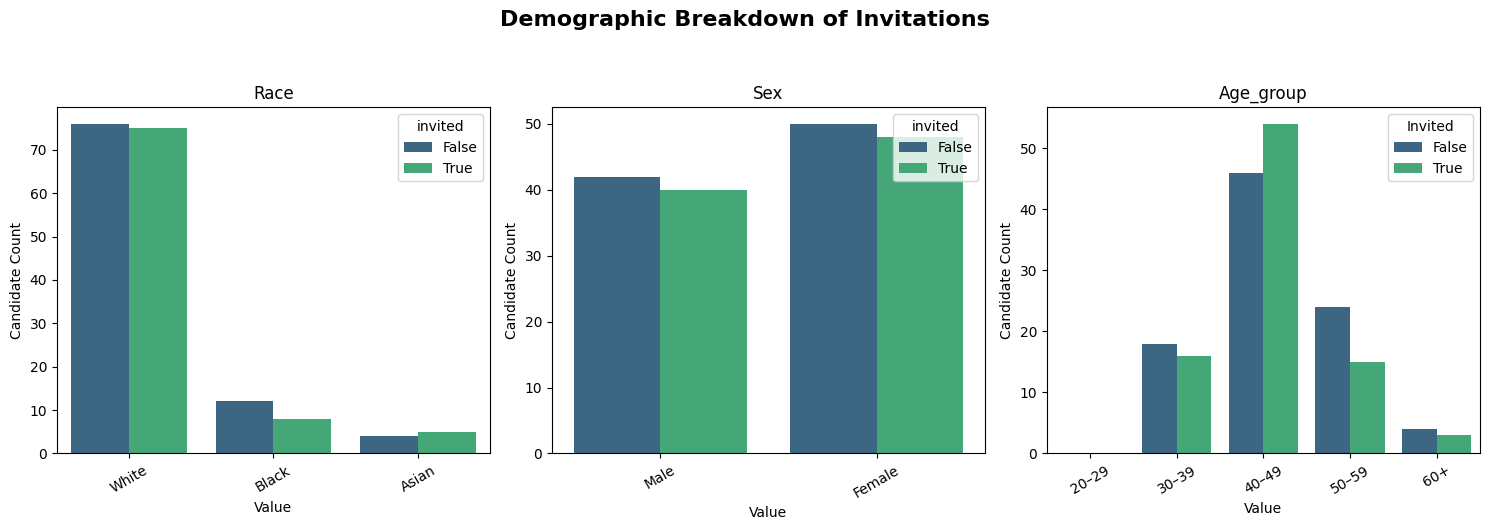

In [292]:
# Ensure booleans + age groups
df_candidates['invited'] = df_candidates['invited'].astype(bool)
df_candidates['age_group'] = pd.cut(
    df_candidates['age'],
    bins=[19, 29, 39, 49, 59, 100],
    labels=["20–29", "30–39", "40–49", "50–59", "60+"]
)

# Define demographic attributes and their correct categories
demo_attributes = {
    'race': ["White", "Black", "Asian"],
    'sex': ["Male", "Female"],
    'age_group': ["20–29", "30–39", "40–49", "50–59", "60+"]
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Loop through each attribute and create a subplot
for i, (attr, categories) in enumerate(demo_attributes.items()):
    # Filter and clean data
    data = df_candidates[[attr, 'invited']].dropna()
    data = data[data[attr].isin(categories)]

    sns.countplot(
        data=data,
        x=attr,
        hue='invited',
        palette='viridis',
        ax=axes[i],
        order=categories
    )
    axes[i].set_title(attr.capitalize())
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Candidate Count")
    axes[i].tick_params(axis='x', rotation=30)

# Adjust layout
plt.suptitle("Demographic Breakdown of Invitations", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.legend(title="Invited")
plt.show()

> Which Attribute is mostly changed when using manipulation?

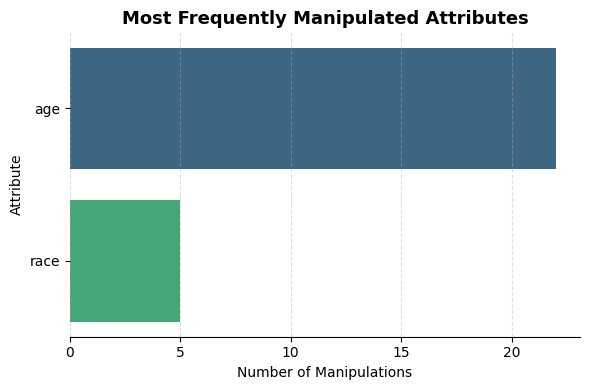

In [293]:
# Count manipulated attributes
manip_attr_freq = (
    df_manipulations['changed_attribute']
    .value_counts()
    .reset_index()
)
manip_attr_freq.columns = ['Attribute', 'Count']  # explicit renaming

plt.figure(figsize=(6, 4))
sns.barplot(
    data=manip_attr_freq,
    x='Count',
    y='Attribute',
    hue='Attribute',
    palette='viridis',
    legend=False    
)
plt.title("Most Frequently Manipulated Attributes", fontsize=13, fontweight='bold')
plt.xlabel("Number of Manipulations")
plt.ylabel("Attribute")
sns.despine(left=True, top=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 6.2 Bias Disparity Metrics
> Are some groups disproportionately excluded?

- Representation ratio: 
```
% of invited from group / % of total from group
```
- Optional: Chi-squared test or disparity scores


In [294]:
# Ensure booleans and clean age groups
df_candidates['invited'] = df_candidates['invited'].astype(bool)
df_candidates['age_group'] = pd.cut(
    df_candidates['age'],
    bins=[19, 29, 39, 49, 59, 100],
    labels=["20–29", "30–39", "40–49", "50–59", "60+"]
)

# Variables to analyze
demo_vars = ['race', 'sex', 'age_group']

# Collect disparity data
disparity_data = []

for attr in demo_vars:
    total_dist = df_candidates[attr].value_counts(normalize=True)
    invited_dist = df_candidates[df_candidates['invited']][attr].value_counts(normalize=True)

    # Combine both and compute ratio
    disparity = pd.concat([invited_dist, total_dist], axis=1, keys=['invited_pct', 'total_pct']).fillna(0)
    disparity['representation_ratio'] = disparity['invited_pct'] / disparity['total_pct']
    disparity['attribute'] = attr
    disparity['group'] = disparity.index

    disparity_data.append(disparity.reset_index(drop=True))

# Combine all
disparity_df = pd.concat(disparity_data, ignore_index=True)

In [295]:
disparity_df

,invited_pct,total_pct,representation_ratio,attribute,group
0,0.852273,0.838889,1.015954,race,White
1,0.090909,0.111111,0.818182,race,Black
2,0.056818,0.050000,1.136364,race,Asian
3,0.545455,0.544444,1.001855,sex,Female
4,0.454545,0.455556,0.997783,sex,Male
5,0.613636,0.555556,1.104545,age_group,40–49
6,0.181818,0.188889,0.962567,age_group,30–39
7,0.170455,0.216667,0.786713,age_group,50–59
8,0.034091,0.038889,0.876623,age_group,60+
9,0.000000,0.000000,NaN,age_group,20–29


### 6.3 Targeted Attribute Manipulation by Demographic

> Are certain user groups more likely to change sensitive attributes (e.g. race, age)?

Cross-tab between user group, manipulated attribute, and candidate demographic.


In [296]:
# Only interactive group has manipulation access
df_int_manip = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()

# Join with original candidate demographics
df_int_demo = df_int_manip.merge(
    df_candidates[['candidate_id', 'sex', 'race', 'age']],
    on='candidate_id',
    how='left'
)

# Bin age for consistency
df_int_demo['age_group'] = pd.cut(
    df_int_demo['age'],
    bins=[19, 29, 39, 49, 59, 100],
    labels=["20–29", "30–39", "40–49", "50–59", "60+"]
)

# Melt demographics into long form for easy crosstab
demo_long = df_int_demo.melt(
    id_vars=['changed_attribute'],
    value_vars=['race', 'sex', 'age_group'],
    var_name='demographic_type',
    value_name='demographic_value'
)

# Count manipulations by (changed_attribute x demographic_type x value)
manip_demo_ct = demo_long.groupby(
    ['changed_attribute', 'demographic_type', 'demographic_value']
).size().reset_index(name='count')


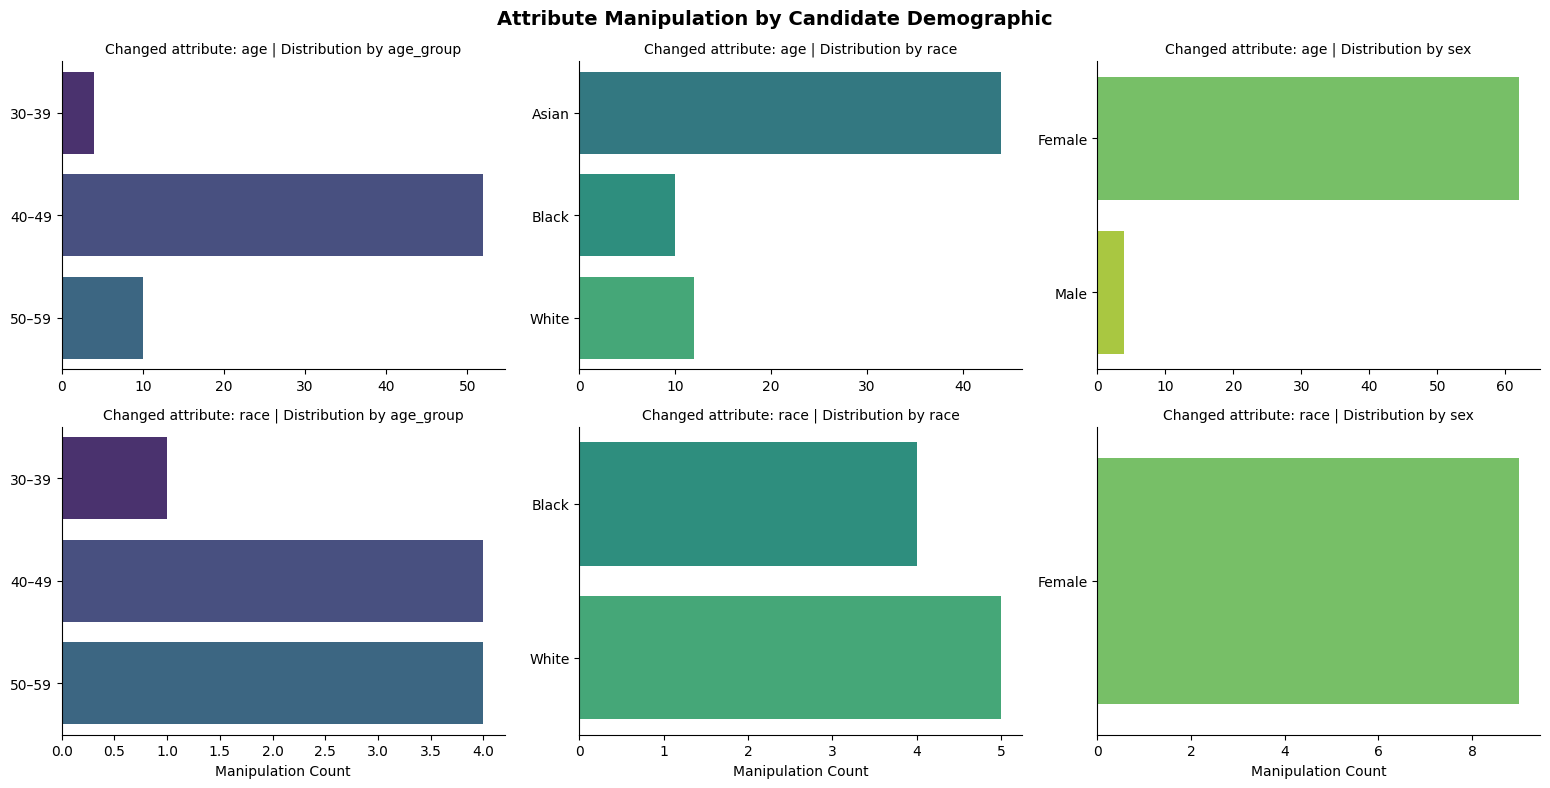

In [297]:
g = sns.catplot(
    data=manip_demo_ct,
    kind='bar',
    x='count',
    y='demographic_value',
    hue='demographic_value',  # Add this to satisfy the future requirement
    col='demographic_type',
    row='changed_attribute',
    palette='viridis',
    height=4,
    aspect=1.3,
    sharex=False,
    sharey=False,
    legend=False  # Optional: legend adds nothing, so we disable
)
g.set_axis_labels("Manipulation Count", "")
g.set_titles(row_template="Changed attribute: {row_name}", col_template="Distribution by {col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Attribute Manipulation by Candidate Demographic", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---

## 7. **Exploratory Metrics**

### 7.1 Hover Behavior
> Do users engage with SHAP/XAI features?

- Total hovers per feature
- Avg. hover duration


In [298]:
# Filter to interactive group and explode hover_events
df_hover = df_candidates[df_candidates['user_group'] == 'interactive'].copy()
hover_data = df_hover.explode('hover_events')
hover_data = hover_data.dropna(subset=['hover_events'])

# Normalize dicts into DataFrame
hover_df = pd.json_normalize(hover_data['hover_events'])
hover_df['session_id'] = hover_data['session_id'].values 
hover_df = hover_df.rename(columns={
    'feature': 'feature',
    'hover_duration': 'duration'
})

# Summary stats
hover_summary = hover_df.groupby('feature').agg(
    total_hovers=('duration', 'count'),
    avg_duration=('duration', 'mean')
).sort_values('total_hovers', ascending=False).reset_index()

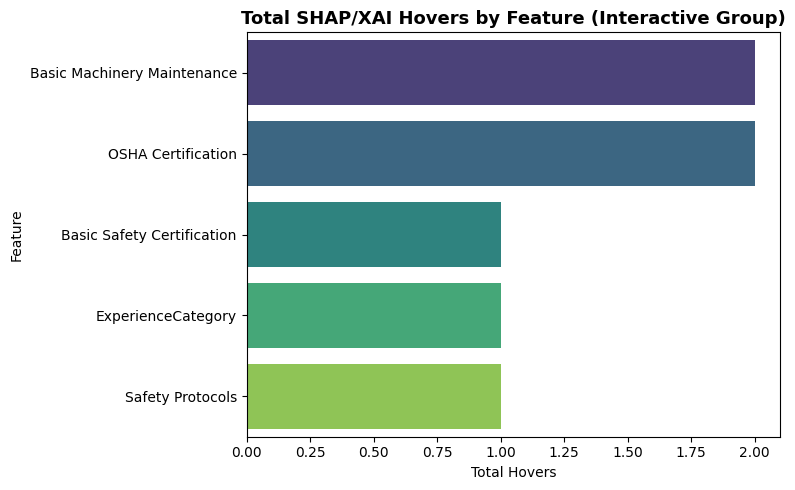

In [299]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=hover_summary,
    x='total_hovers',
    y='feature',
    hue='feature',     
    palette='viridis',
    legend=False         
)
plt.title("Total SHAP/XAI Hovers by Feature (Interactive Group)", fontsize=13, fontweight='bold')
plt.xlabel("Total Hovers")
plt.ylabel("Feature")
plt.tight_layout()  
plt.show()

> Avg number of hovers per round?

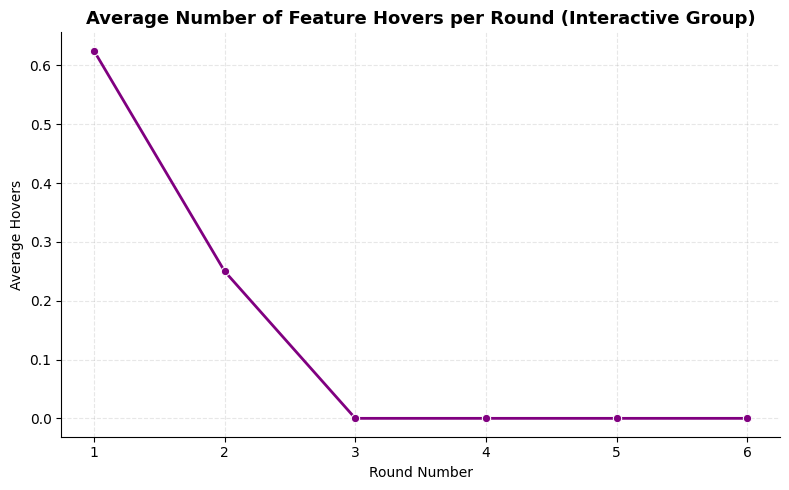

In [300]:
df_hover = df_candidates[df_candidates['user_group'] == 'interactive'].copy()
df_hover['hover_count'] = df_hover['hover_events'].apply(lambda x: len(x) if isinstance(x, list) else 0)

hover_per_round = df_hover.groupby(['session_id', 'round_number']).agg(
    total_hovers=('hover_count', 'sum')
).reset_index()

avg_hover_per_round = hover_per_round.groupby('round_number').agg(
    avg_hovers=('total_hovers', 'mean')
).reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_hover_per_round, x='round_number', y='avg_hovers', marker='o', linewidth=2, color='purple')
sns.despine()
plt.grid(True, linestyle='--', alpha=0.3)
plt.title('Average Number of Feature Hovers per Round (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Average Hovers')
plt.tight_layout()
plt.show()

### 7.2 Manipulation Sequences
> Complex manipulation strategies?

- Sequence of changed attributes
- Manipulation timing patterns

In [318]:
from collections import Counter

# Filter only interactive group with actual manipulations
manip_seqs = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()

# Sort manipulations by time to get correct sequence
manip_seqs = manip_seqs.sort_values(['session_id', 'round_number', 'candidate_id', 'timestamp'])

# Group into ordered lists of attribute changes per candidate
sequences = (
    manip_seqs.groupby(['session_id', 'round_number', 'candidate_id'])['changed_attribute']
    .apply(list)
)

# Count most frequent sequences
sequence_counts = Counter(tuple(seq) for seq in sequences)
most_common_seqs = pd.DataFrame(sequence_counts.most_common(10), columns=['Sequence', 'Count'])
most_common_seqs

,Sequence,Count
0,"(age, age, age, age, race, race)",1
1,"(age, age)",1
2,"(age, age, age, age, age, race, race)",1
3,"(race,)",1
4,"(age, age, age, age, age, age)",1
5,"(age, age, age, age, age)",1


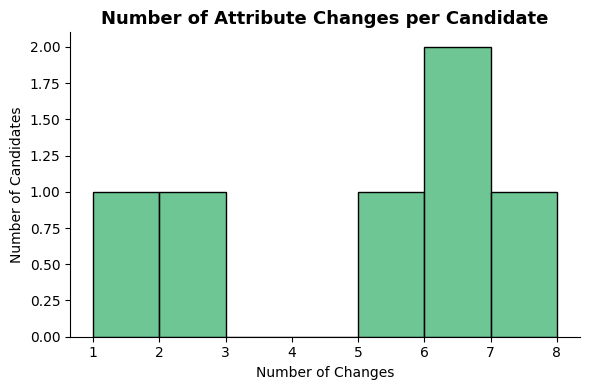

In [319]:
manip_counts = sequences.apply(len)

plt.figure(figsize=(6, 4))
sns.histplot(manip_counts, bins=range(1, manip_counts.max() + 2), color='mediumseagreen')
plt.title('Number of Attribute Changes per Candidate', fontsize=13, fontweight='bold')
plt.xlabel('Number of Changes')
plt.ylabel('Number of Candidates')
sns.despine()
plt.tight_layout()
plt.show()

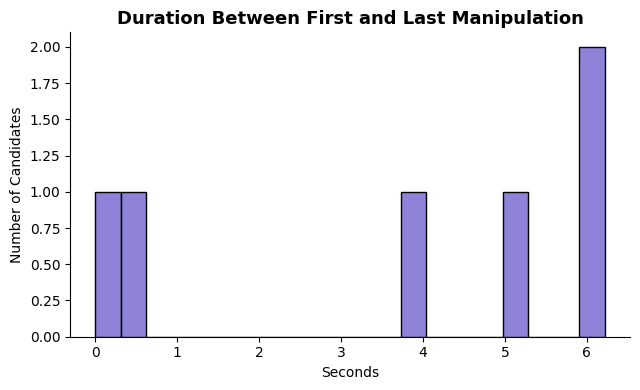

In [322]:
df_manipulations['timestamp'] = pd.to_datetime(df_manipulations['timestamp'])

time_span = df_manipulations[df_manipulations['user_group'] == 'interactive'].groupby(
    ['session_id', 'round_number', 'candidate_id']
).agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max')
)

time_span['duration_secs'] = (time_span['end_time'] - time_span['start_time']).dt.total_seconds()

plt.figure(figsize=(6.5, 4))
sns.histplot(time_span['duration_secs'], bins=20, color='slateblue')
plt.title('Duration Between First and Last Manipulation', fontsize=13, fontweight='bold')
plt.xlabel('Seconds')
plt.ylabel('Number of Candidates')
sns.despine()
plt.tight_layout()
plt.show()


### 7.3 Hover-to-Invite Correlation

> Do users who hover longer or on more features trust the AI more?

Correlate total hover duration with recommendation acceptance rate.

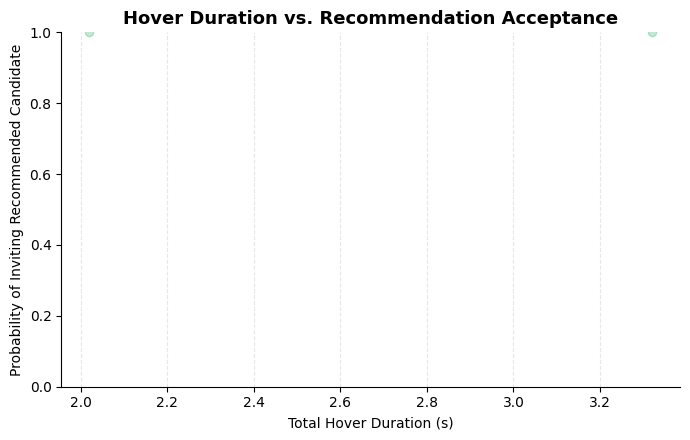

Not enough variation in invite values to compute correlation.


In [331]:
from itertools import chain

# Extract hover events into flat structure
hover_summary = []
for _, row in df_candidates[df_candidates['user_group'] == 'interactive'].iterrows():
    hovers = row['hover_events']
    if not hovers or not isinstance(hovers, list):
        continue
    for event in hovers:
        hover_summary.append({
            'session_id': row['session_id'],
            'round_number': row['round_number'],
            'candidate_id': row['candidate_id'],
            'duration': event.get('hover_duration', 0),
            'feature': event.get('feature')
        })

df_hovers = pd.DataFrame(hover_summary)

# Aggregate hover behavior per candidate
hover_agg = df_hovers.groupby(['session_id', 'round_number', 'candidate_id']).agg(
    total_hover_duration=('duration', 'sum'),
    num_hovered_features=('feature', 'nunique')
).reset_index()

# Merge with candidate metadata
hover_analysis = df_candidates[df_candidates['user_group'] == 'interactive'][[
    'session_id', 'round_number', 'candidate_id', 'recommended', 'invited'
]].merge(
    hover_agg,
    on=['session_id', 'round_number', 'candidate_id'],
    how='left'
)

# Filter to recommended candidates only
hover_analysis = hover_analysis[hover_analysis['recommended'] == True].copy()

# Fill NaNs (for candidates with no hovers) with 0
hover_analysis[['total_hover_duration', 'num_hovered_features']] = hover_analysis[[
    'total_hover_duration', 'num_hovered_features'
]].fillna(0)

# Keep only candidates with non-zero hover interaction
hover_valid = hover_analysis[
    (hover_analysis['total_hover_duration'] > 0) |
    (hover_analysis['num_hovered_features'] > 0)
].copy()
hover_valid['invited'] = hover_valid['invited'].astype(int)

# Plot: Hover duration vs invite
plt.figure(figsize=(7, 4.5))
sns.regplot(
    data=hover_valid,
    x='total_hover_duration',
    y='invited',
    logistic=True,
    scatter_kws={'alpha': 0.3},
    color='mediumseagreen'
)
plt.xlabel('Total Hover Duration (s)')
plt.ylabel('Probability of Inviting Recommended Candidate')
plt.title('Hover Duration vs. Recommendation Acceptance', fontsize=13, fontweight='bold')
plt.ylim(0, 1)
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Pearson correlation (hover duration and invite rate)
if hover_valid['invited'].nunique() > 1:
    corr_duration = hover_valid[['total_hover_duration', 'invited']].corr().iloc[0, 1]
    corr_features = hover_valid[['num_hovered_features', 'invited']].corr().iloc[0, 1]
    print(f"Correlation between hover duration and invite: {corr_duration:.2f}")
    print(f"Correlation between number of hovered features and invite: {corr_features:.2f}")
else:
    print("Not enough variation in invite values to compute correlation.")

---

## 8. Meta-Behavioral Patterns & Strategy Shifts
Capture higher-order behavioral strategies and adaptability


### 8.1 Strategy Switches

Do users switch from trusting to ignoring the AI over rounds?


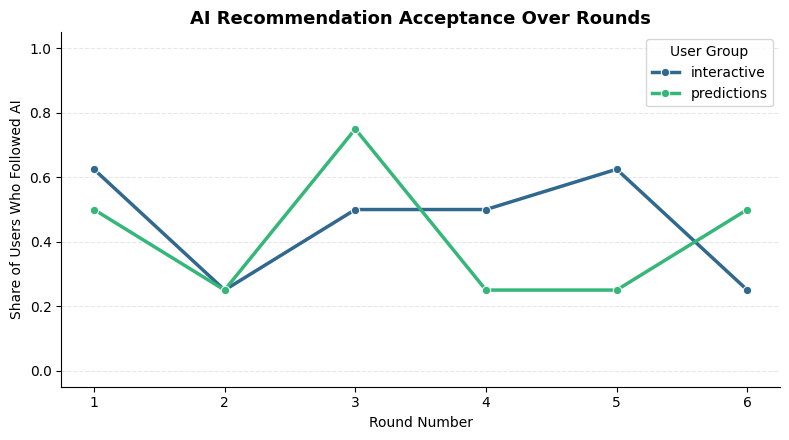

In [334]:
# Only interactive or AI-enabled users
df_strat = df_candidates[
    df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])
].copy()

# Identify if recommendation was followed per round
df_strat['followed_ai'] = df_strat['recommended'] & df_strat['invited']

# Filter to only recommended candidates (one per round)
recommended_rounds = df_strat[df_strat['recommended']].copy()

# Compute average follow rate per round and user group
avg_trust = recommended_rounds.groupby(['user_group', 'round_number']).agg(
    avg_followed=('followed_ai', 'mean')
).reset_index()

# Plot mean lines per user group
plt.figure(figsize=(8, 4.5))
sns.lineplot(
    data=avg_trust,
    x='round_number',
    y='avg_followed',
    hue='user_group',
    palette='viridis',
    linewidth=2.5,
    marker='o'
)
plt.title('AI Recommendation Acceptance Over Rounds', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Share of Users Who Followed AI')
plt.ylim(-0.05, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='User Group')
sns.despine()
plt.tight_layout()
plt.show()


### 8.2 User Archetypes

Can we cluster users into types (e.g. conformists, skeptics, experimenters)?

Optional, but could be a powerful discussion anchor

Use session-level metrics like:
- Trust rate (recommendation alignment)
- Manipulation frequency
- Invite generosity
- Hover time

In [335]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Base: sessions from AI-enabled groups
sessions = df_candidates[df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])].copy()

# 1. Trust rate per session (recommended & invited)
sessions['followed_ai'] = sessions['recommended'] & sessions['invited']
trust = sessions[sessions['recommended']].groupby('session_id')['followed_ai'].mean().rename('trust_rate')

# 2. Invite generosity (% of candidates invited)
invite_rate = sessions.groupby('session_id')['invited'].mean().rename('invite_rate')

# 3. Manipulation frequency per session
manip_count = df_manipulations.groupby('session_id').size().rename('manip_freq')
rounds_per_session = df_rounds.groupby('session_id').size().rename('num_rounds')
manip_freq = (manip_count / rounds_per_session).fillna(0)

# 4. Avg hover time per session (only interactive group has hovers)
hover_summary = []
for _, row in df_candidates[df_candidates['user_group'] == 'interactive'].iterrows():
    for event in row.get('hover_events', []):
        hover_summary.append({
            'session_id': row['session_id'],
            'duration': event.get('hover_duration', 0)
        })
df_hovers = pd.DataFrame(hover_summary)
hover_time = df_hovers.groupby('session_id')['duration'].mean().rename('hover_time_avg')

# Combine features into one dataframe
user_features = pd.concat([trust, invite_rate, manip_freq, hover_time], axis=1).fillna(0)

# Standardize
scaler = StandardScaler()
feature_cols = ['trust_rate', 'invite_rate', 'manip_freq', 'hover_time_avg']
X_scaled = scaler.fit_transform(user_features[feature_cols])

# Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
user_features['cluster'] = kmeans.fit_predict(X_scaled)

# Optional: reduce to 2D for plotting
pca = PCA(n_components=2)
user_features[['pca_1', 'pca_2']] = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=user_features, x='pca_1', y='pca_2', hue='cluster', palette='viridis', s=70)
plt.title('User Archetypes Based on Session Behavior', fontsize=13, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

### Composite Metric

You could also build a **Group Profile Scorecard** with:

| Metric | Group A | Group B | Group C | Interpretation |
|--------|---------|---------|---------|----------------|
| Invite Rate |     |         |         | Generosity |
| Skip Rate |     |         |         | Caution or indecision |
| Recommendation Acceptance |     |         |         | AI trust |
| Reversals |     |         |         | Override tendency |
| Avg Round Time |     |         |         | Cognitive load |
